In [2]:
library("MTS")
library(tsDyn) # for vecm
library(urca)
library(lmtest) #granger test
library('readxl')
library('ggplot2')
library('dplyr')
library(lubridate)
library(corrplot)
library(tseries)
library(vars)
library(xts)
library(forecast)
options(warn=-1)


# Read Data

In [3]:
covid=read_excel('covid.xlsx')
unemployment=read_excel('unemployment.xlsx')
economic=read_excel('Economic.xlsx')
health=read_excel('Health.xlsx')
response=read_excel('response.xlsx')
stringency=read_excel('Stringency.xlsx')
colnames(covid)=c('Date','Sing','UK','US')
colnames(unemployment)=c('Date','Sing','UK','US')
colnames(economic)=c('Date','Sing','UK','US')
colnames(health)=c('Date','Sing','UK','US')
colnames(response)=c('Date','Sing','UK','US')
colnames(stringency)=c('Date','Sing','UK','US')
covid$Date=as.Date(covid$Date)
economic$Date=as.Date(economic$Date)
health$Date=as.Date(health$Date)
response$Date=as.Date(response$Date)
stringency$Date=as.Date(stringency$Date)
head(covid)
head(unemployment)

Date,Sing,UK,US
<date>,<dbl>,<dbl>,<dbl>
2020-01-01,0,0,0
2020-01-02,0,0,0
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,0,0,0


Date,Sing,UK,US
<chr>,<dbl>,<dbl>,<dbl>
01/2020,2.4,3.9,3.5
02/2020,2.4,4.0,3.5
03/2020,2.4,4.0,4.4
04/2020,2.6,4.0,14.8
05/2020,2.8,4.1,13.3
06/2020,2.8,4.1,11.1


# Show Data

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



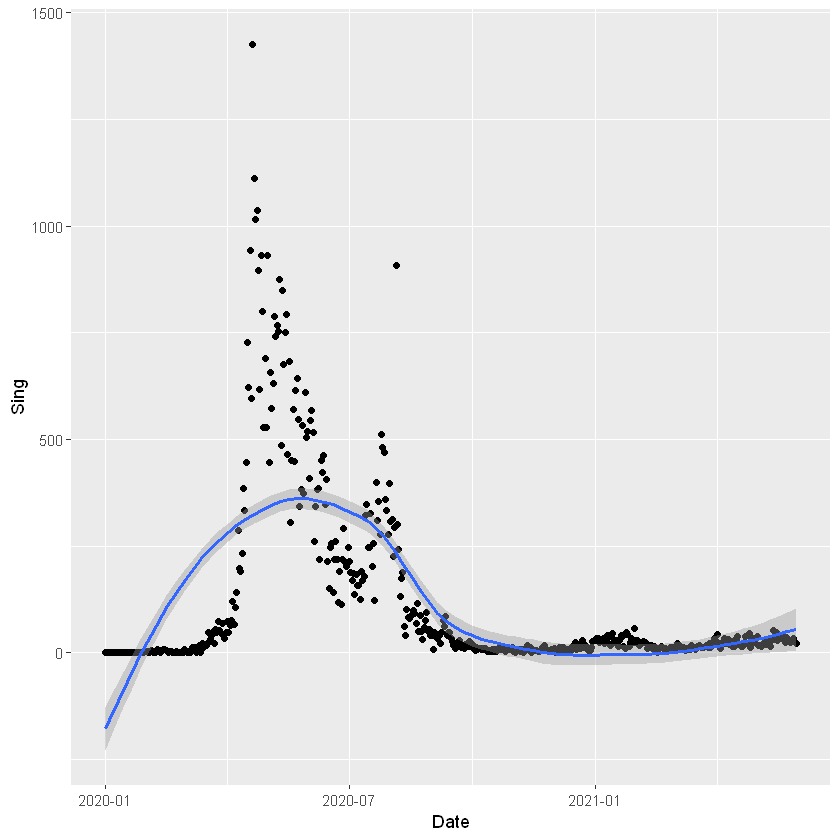

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



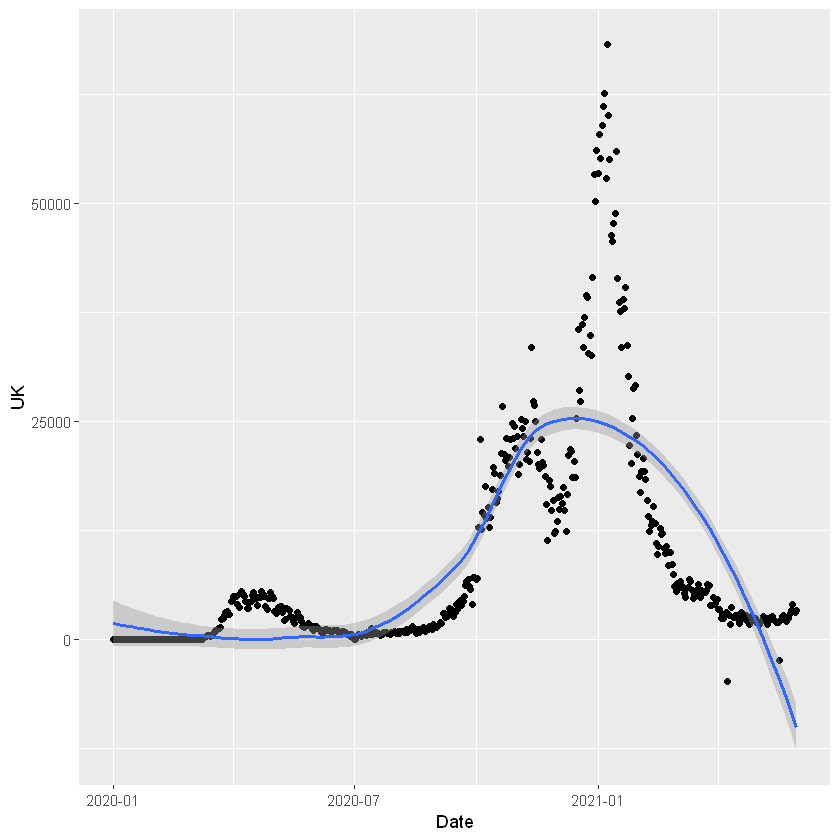

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



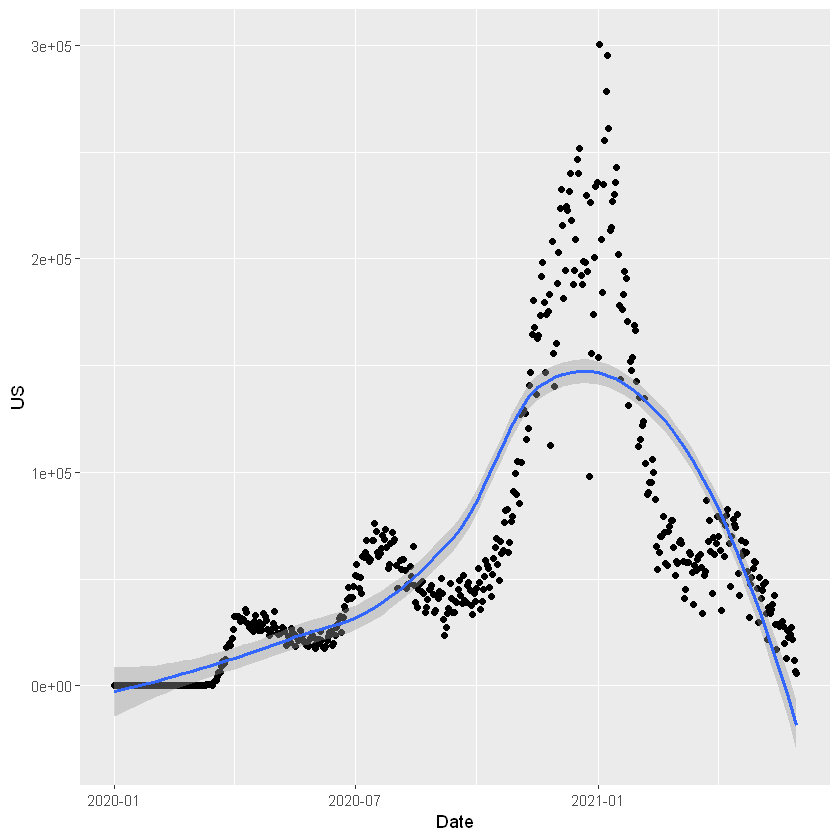

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



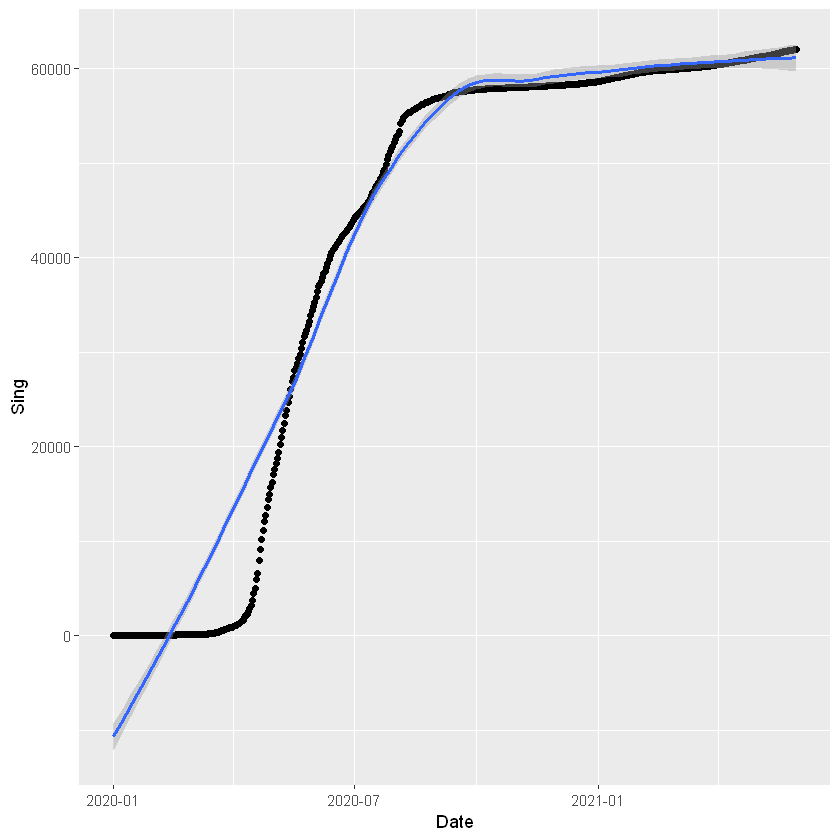

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



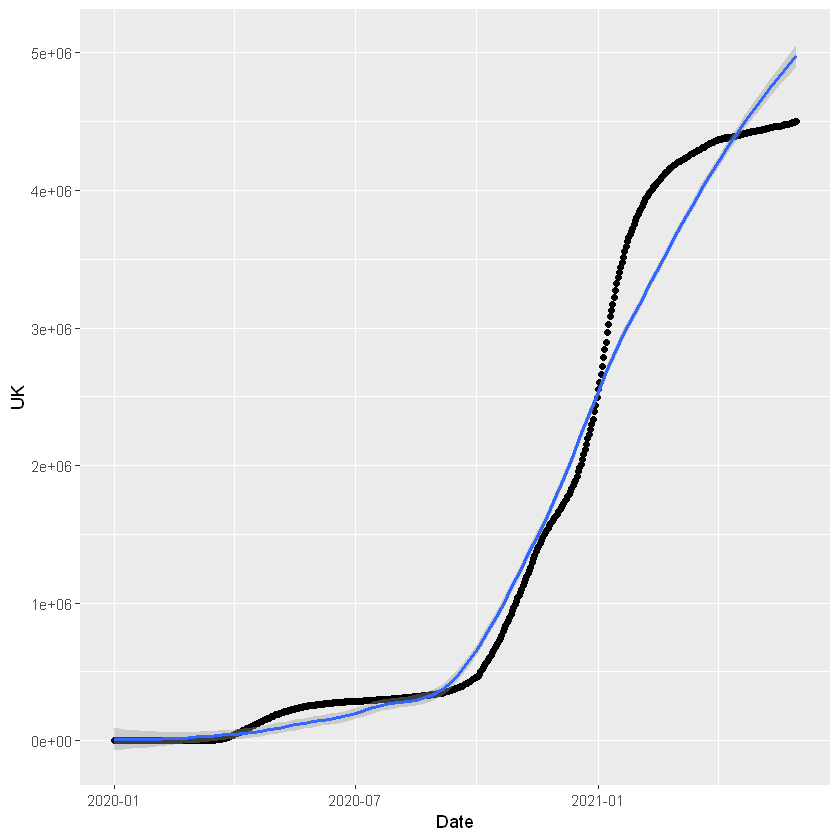

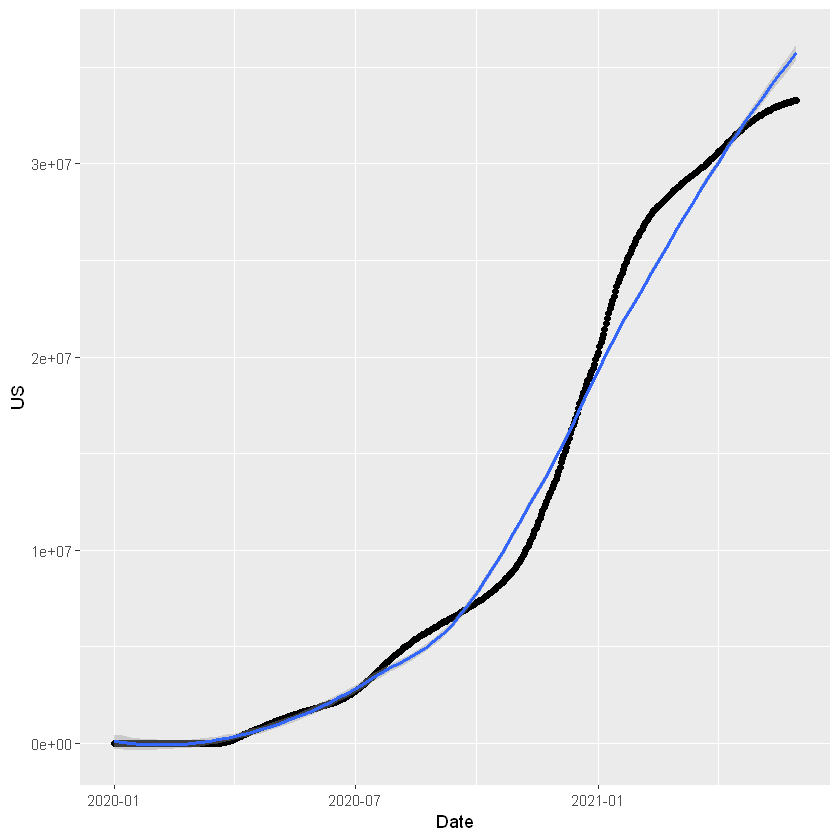

In [7]:
ggplot(data=covid,mapping = aes(x=Date,y=Sing))+geom_point()+geom_smooth()
ggplot(data=covid,mapping = aes(x=Date,y=UK))+geom_point()+geom_smooth()
ggplot(data=covid,mapping = aes(x=Date,y=US))+geom_point()+geom_smooth()
cumsum_covid=covid
cumsum_covid$Sing=cumsum(covid$Sing)
cumsum_covid$UK=cumsum(covid$UK)
cumsum_covid$US=cumsum(covid$US)
ggplot(data=cumsum_covid,mapping = aes(x=Date,y=Sing))+geom_point()+geom_smooth()
ggplot(data=cumsum_covid,mapping = aes(x=Date,y=UK))+geom_point()+geom_smooth()
ggplot(data=cumsum_covid,mapping = aes(x=Date,y=US))+geom_point()+geom_smooth()


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



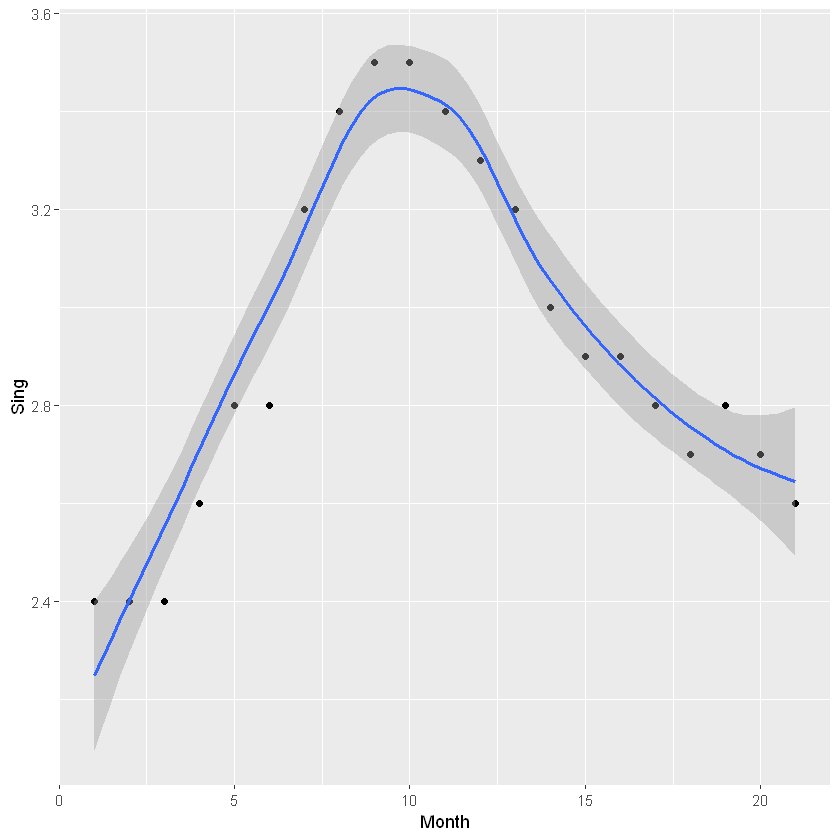

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



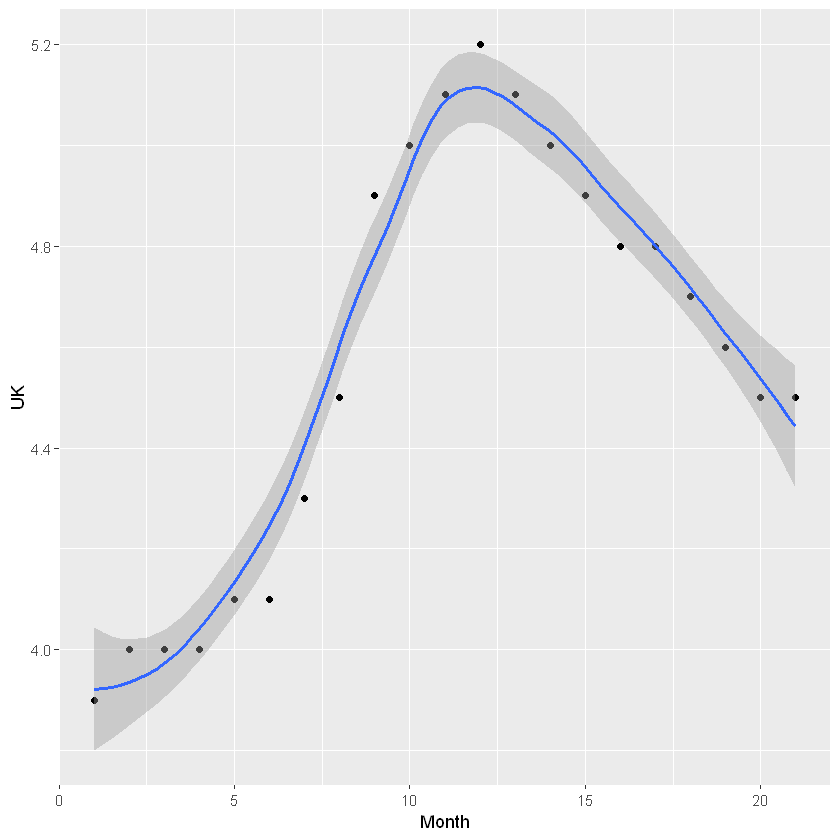

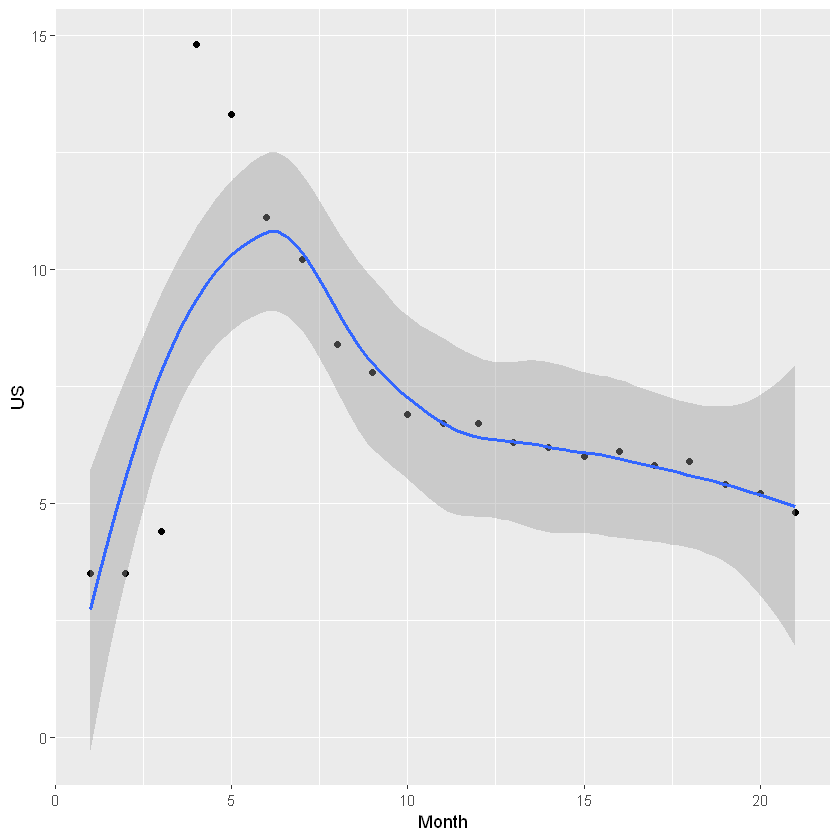

In [8]:
unemployment$Month=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)
ggplot(data=unemployment,mapping = aes(x=Month,y=Sing))+geom_point()+geom_smooth()
ggplot(data=unemployment,mapping = aes(x=Month,y=UK))+geom_point()+geom_smooth()
ggplot(data=unemployment,mapping = aes(x=Month,y=US))+geom_point()+geom_smooth()


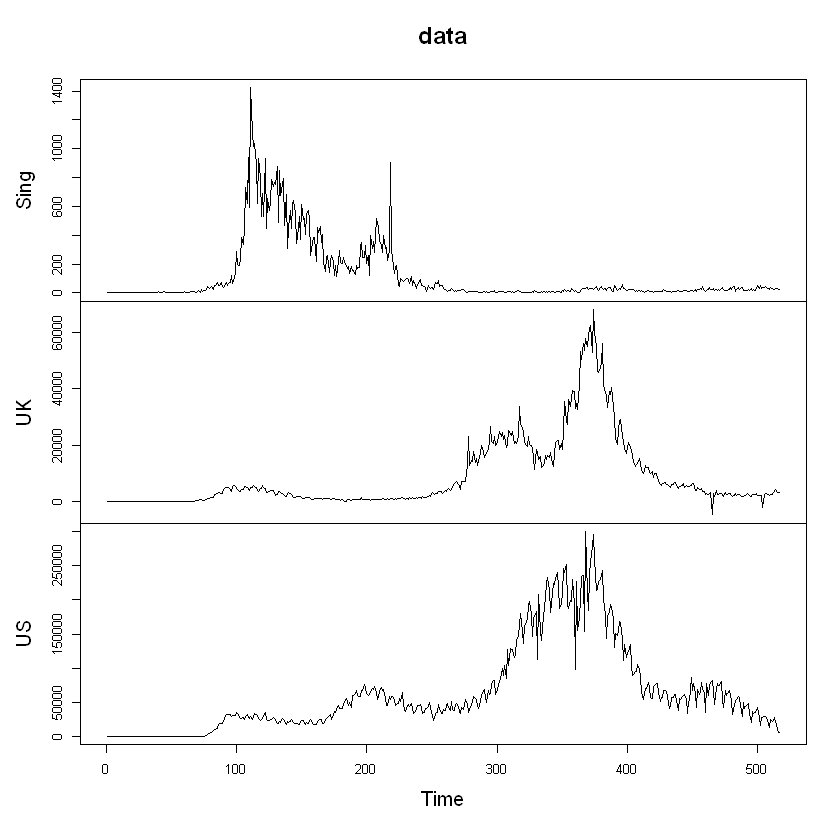

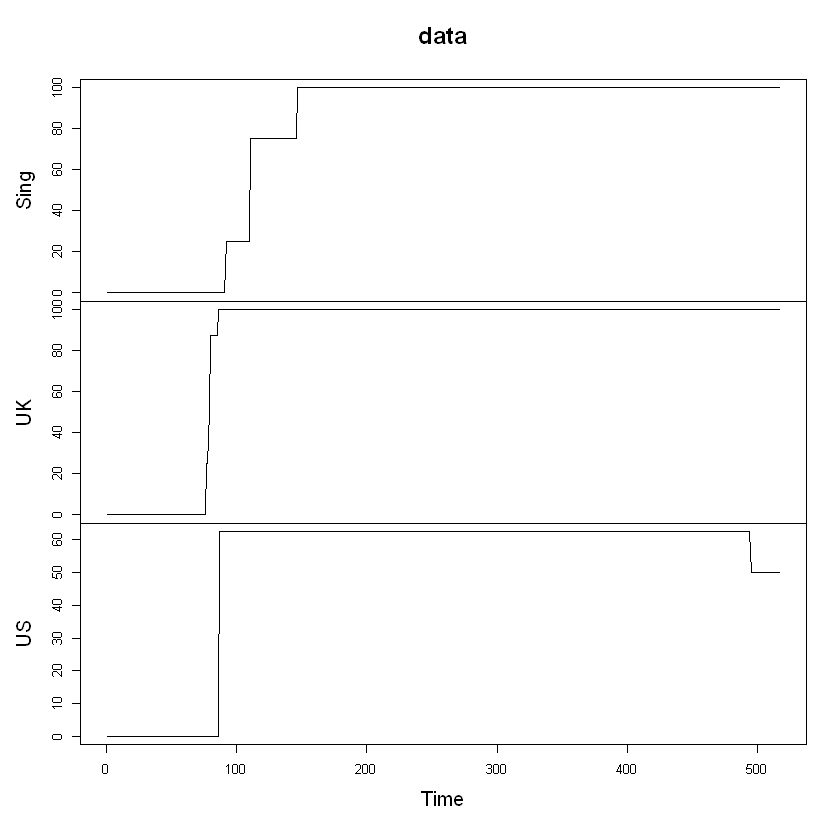

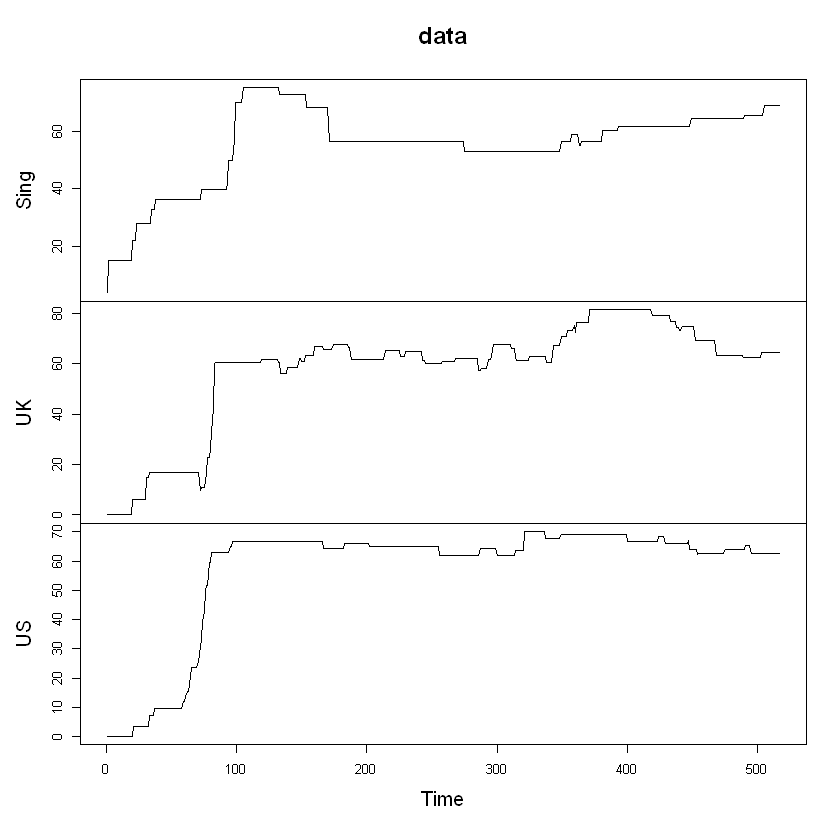

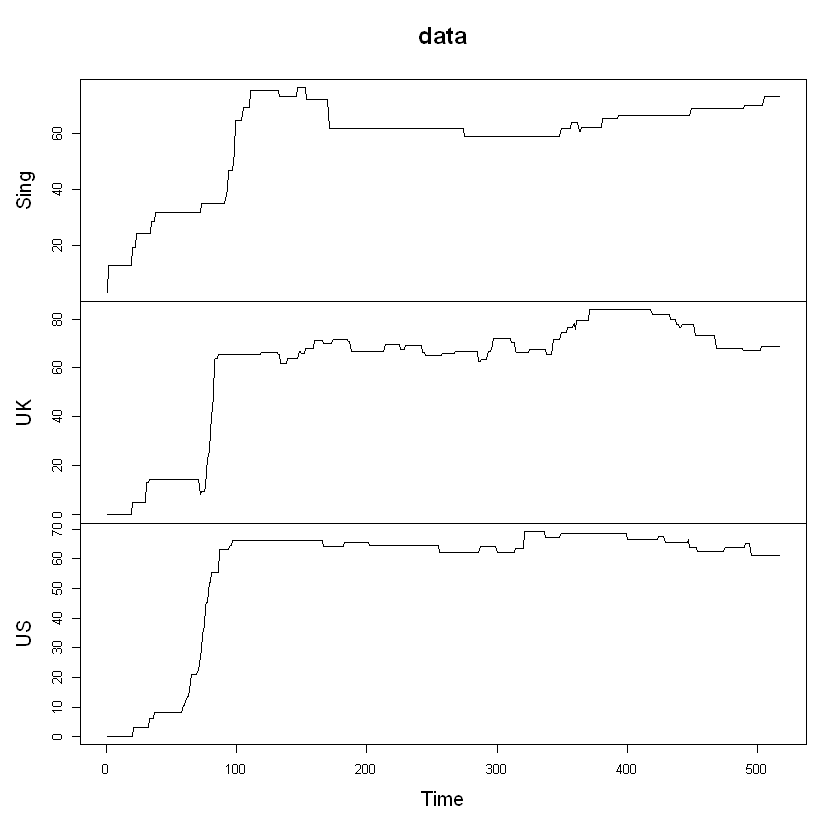

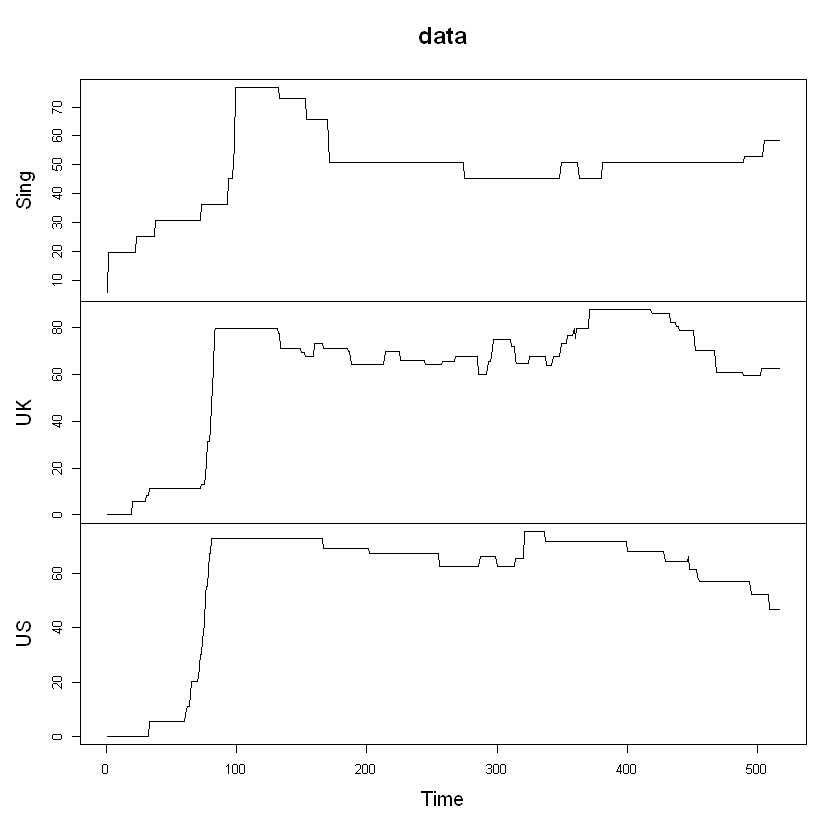

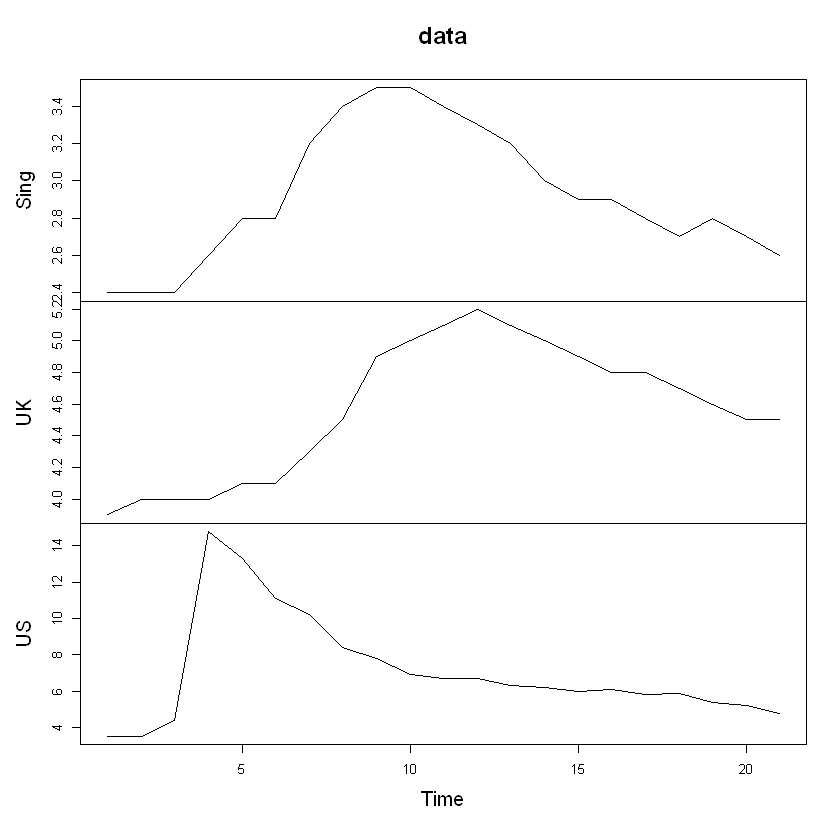

In [9]:
MTSplot(as.ts(covid[,c(2,3,4)]))
MTSplot(as.ts(economic[,c(2,3,4)]))
MTSplot(as.ts(health[,c(2,3,4)]))
MTSplot(as.ts(response[,c(2,3,4)]))
MTSplot(as.ts(stringency[,c(2,3,4)]))
MTSplot(as.ts(unemployment[,c(2,3,4)]))

# Correlation

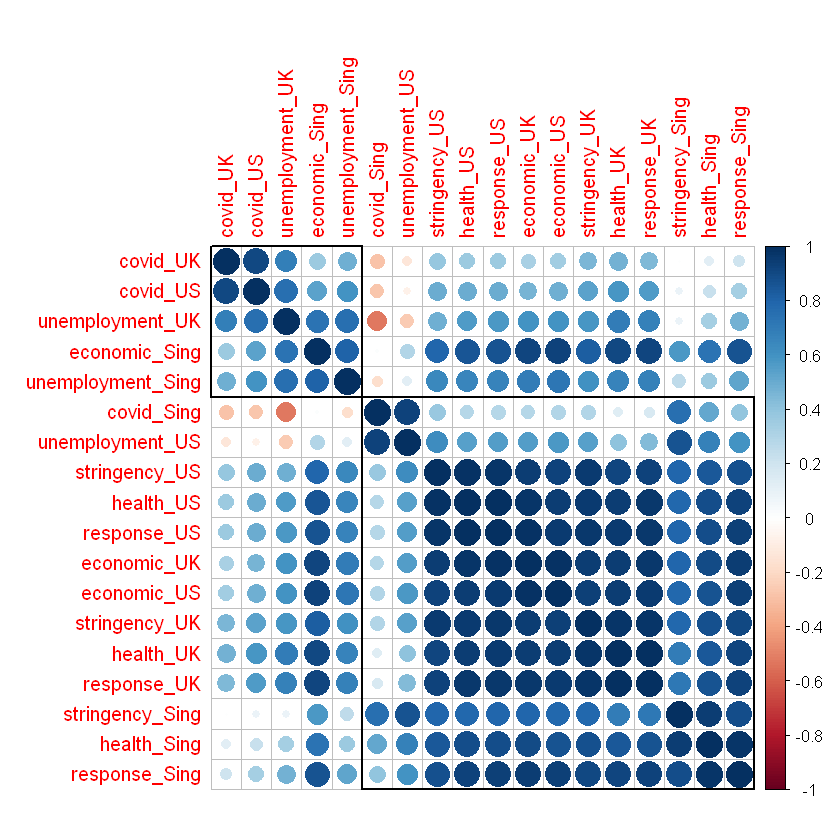

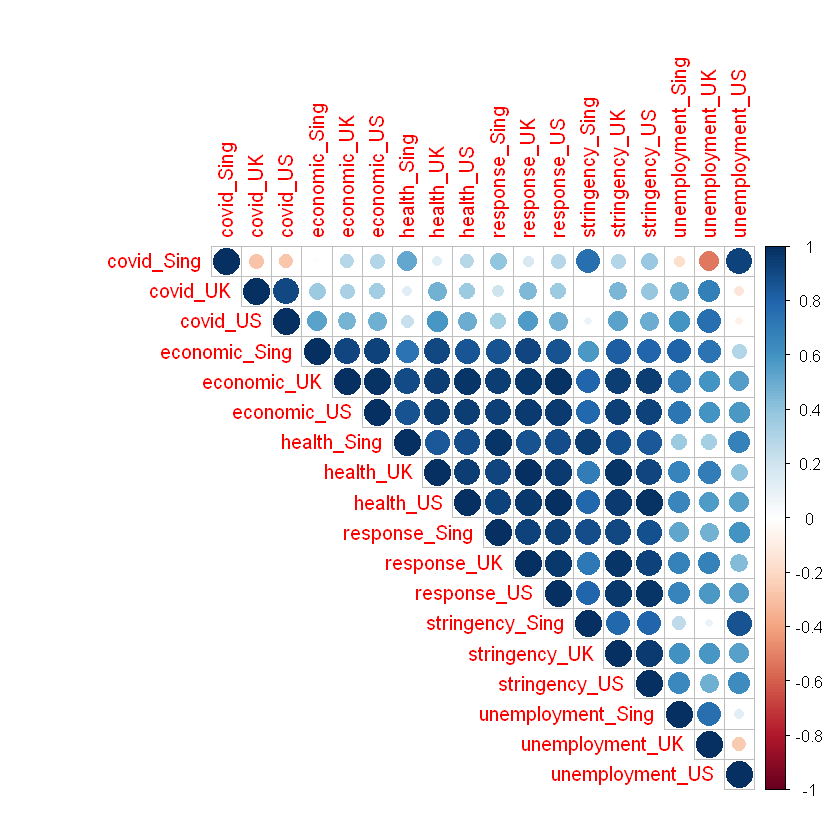

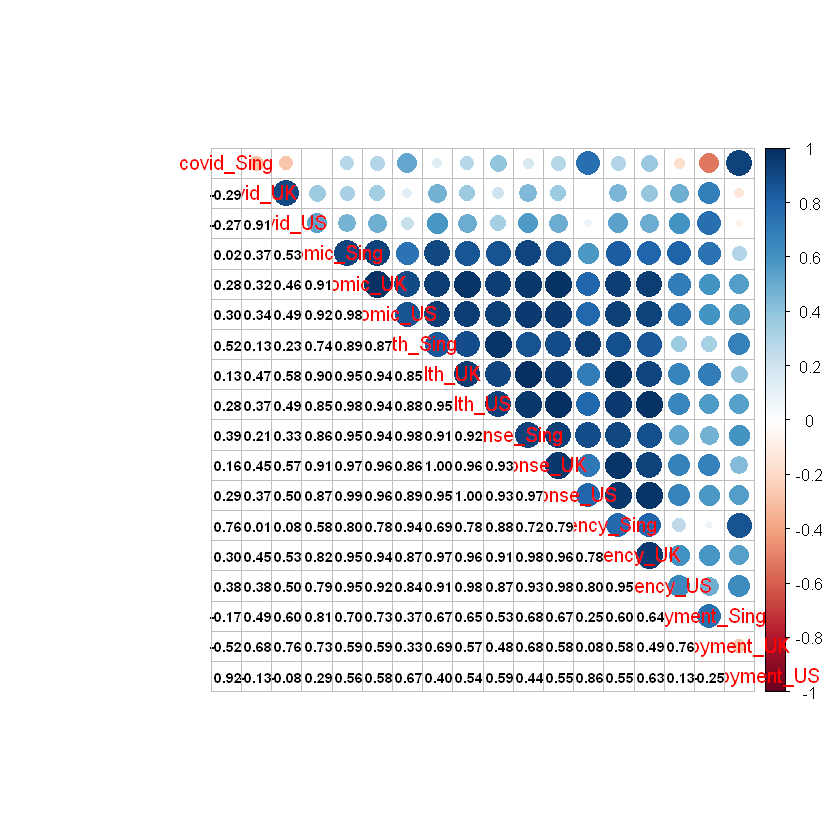

In [10]:
colnames(covid)=c('Date','covid_Sing','covid_UK','covid_US')
colnames(economic)=c('Date','economic_Sing','economic_UK','economic_US')
colnames(health)=c('Date','health_Sing','health_UK','health_US')
colnames(response)=c('Date','response_Sing','response_UK','response_US')
colnames(stringency)=c('Date','stringency_Sing','stringency_UK','stringency_US')
total=merge(covid,economic,by="Date")
total=merge(total,health,by="Date")
total=merge(total,response,by="Date")
total=merge(total,stringency,by="Date")
totalbymonth1 <- aggregate(cbind(covid_Sing,covid_UK,covid_US,economic_Sing,economic_UK,economic_US,health_Sing,health_UK,health_US,response_Sing,response_UK,response_US,stringency_Sing,stringency_UK,stringency_US)~month(Date),
             data=total[total["Date"]<="2020-12-31 UTC",],FUN=sum)
totalbymonth2 <- aggregate(cbind(covid_Sing,covid_UK,covid_US,economic_Sing,economic_UK,economic_US,health_Sing,health_UK,health_US,response_Sing,response_UK,response_US,stringency_Sing,stringency_UK,stringency_US)~month(Date),
             data=total[total["Date"]>="2021-01-01 UTC",],FUN=sum)

colnames(totalbymonth1)[1]="Month"
colnames(totalbymonth2)[1]="Month"

totalbymonth2$Month=c(13,14,15,16,17)
totalbymonth=rbind(totalbymonth1,totalbymonth2)

colnames(unemployment)=c("Date","unemployment_Sing","unemployment_UK","unemployment_US","Month")

totalbymonth=merge(totalbymonth,unemployment,by="Month")
totalbymonth=totalbymonth[,-17]
M = cor(totalbymonth[,-1])
corrplot(M, order = "hclust", addrect = 2)
corrplot(M, type = "upper")
corrplot.mixed(M, lower.col = "black", number.cex = .7)

# Linear Model

In [11]:
model_Sing_lm=lm(unemployment_Sing~economic_Sing+health_Sing+response_Sing+stringency_Sing+covid_Sing,data = totalbymonth)
summary(model_Sing_lm)


Call:
lm(formula = unemployment_Sing ~ economic_Sing + health_Sing + 
    response_Sing + stringency_Sing + covid_Sing, data = totalbymonth)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25021 -0.11540  0.02254  0.09730  0.20212 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.567e+00  3.292e-01   7.799 8.31e-06 ***
economic_Sing    1.029e-01  6.492e-02   1.585    0.141    
health_Sing      7.165e-01  4.548e-01   1.575    0.143    
response_Sing   -8.207e-01  5.196e-01  -1.580    0.143    
stringency_Sing  1.612e-03  1.003e-03   1.606    0.137    
covid_Sing      -3.128e-05  2.960e-05  -1.057    0.313    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1756 on 11 degrees of freedom
Multiple R-squared:  0.856,	Adjusted R-squared:  0.7905 
F-statistic: 13.07 on 5 and 11 DF,  p-value: 0.0002551


In [12]:
model_US_lm=lm(unemployment_US~economic_US+health_US+response_US+stringency_US+covid_US,data = totalbymonth)
summary(model_US_lm)


Call:
lm(formula = unemployment_US ~ economic_US + health_US + response_US + 
    stringency_US + covid_US, data = totalbymonth)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0154 -1.2542 -0.0179  0.8272  3.1884 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.123e+00  1.439e+00   2.865  0.01539 * 
economic_US   -1.128e-01  9.539e-01  -0.118  0.90798   
health_US     -8.264e-01  6.674e+00  -0.124  0.90369   
response_US    9.297e-01  7.629e+00   0.122  0.90521   
stringency_US  1.271e-02  3.325e-03   3.822  0.00283 **
covid_US      -8.554e-07  2.603e-07  -3.287  0.00724 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.753 on 11 degrees of freedom
Multiple R-squared:  0.7907,	Adjusted R-squared:  0.6956 
F-statistic: 8.313 on 5 and 11 DF,  p-value: 0.001806


In [13]:
model_UK_lm=lm(unemployment_UK~economic_UK+health_UK+response_UK+stringency_UK+covid_UK,data = totalbymonth)
summary(model_UK_lm)


Call:
lm(formula = unemployment_UK ~ economic_UK + health_UK + response_UK + 
    stringency_UK + covid_UK, data = totalbymonth)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39788 -0.05597  0.01124  0.10677  0.34587 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.851e+00  1.989e-01  19.362 7.56e-10 ***
economic_UK   -6.679e-02  1.067e-01  -0.626   0.5440    
health_UK     -4.671e-01  7.461e-01  -0.626   0.5440    
response_UK    5.355e-01  8.527e-01   0.628   0.5429    
stringency_UK -1.215e-03  4.113e-04  -2.954   0.0131 *  
covid_UK       6.352e-07  2.158e-07   2.944   0.0134 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2505 on 11 degrees of freedom
Multiple R-squared:  0.808,	Adjusted R-squared:  0.7207 
F-statistic: 9.258 on 5 and 11 DF,  p-value: 0.001155


# data representation

In [14]:
total.Sing=total[,c("Date","covid_Sing","economic_Sing","health_Sing","response_Sing","stringency_Sing")]
total.US=total[,c("Date","covid_US","economic_US","health_US","response_US","stringency_US")]
total.UK=total[,c("Date","covid_UK","economic_UK","health_UK","response_UK","stringency_UK")]
totalbymonth.Sing=totalbymonth[,c("Month","covid_Sing","economic_Sing","health_Sing","response_Sing","stringency_Sing","unemployment_Sing")]
totalbymonth.US=totalbymonth[,c("Month","covid_US","economic_US","health_US","response_US","stringency_US","unemployment_US")]
totalbymonth.UK=totalbymonth[,c("Month","covid_UK","economic_UK","health_UK","response_UK","stringency_UK","unemployment_UK")]

# Granger Test

In [15]:
for (i in 2:7){
  for(j in 2:7){
    if (j!=i){
      GX=colnames(totalbymonth.Sing)[i]
      GY=colnames(totalbymonth.Sing)[j]
      EGtest <- grangertest(totalbymonth.Sing[,j] ~ totalbymonth.Sing[,i],order = 1, data = totalbymonth.Sing)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

[1] "covid_Sing  is a cause for economic_Sing"
[1] "covid_Sing  is a cause for unemployment_Sing"
[1] "economic_Sing  is a cause for covid_Sing"
[1] "economic_Sing  is a cause for health_Sing"
[1] "economic_Sing  is a cause for stringency_Sing"
[1] "health_Sing  is a cause for economic_Sing"
[1] "response_Sing  is a cause for economic_Sing"
[1] "response_Sing  is a cause for health_Sing"
[1] "stringency_Sing  is a cause for economic_Sing"
[1] "unemployment_Sing  is a cause for covid_Sing"


In [16]:
for (i in 2:7){
  for(j in 2:7){
    if (j!=i){
      GX=colnames(totalbymonth.US)[i]
      GY=colnames(totalbymonth.US)[j]
      EGtest <- grangertest(totalbymonth.US[,j] ~ totalbymonth.US[,i],order = 1, data = totalbymonth.US)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

[1] "economic_US  is a cause for health_US"
[1] "economic_US  is a cause for response_US"
[1] "economic_US  is a cause for stringency_US"
[1] "health_US  is a cause for economic_US"
[1] "health_US  is a cause for response_US"
[1] "response_US  is a cause for economic_US"
[1] "response_US  is a cause for health_US"
[1] "stringency_US  is a cause for economic_US"


In [17]:
for (i in 2:7){
  for(j in 2:7){
    if (j!=i){
      GX=colnames(totalbymonth.UK)[i]
      GY=colnames(totalbymonth.UK)[j]
      EGtest <- grangertest(totalbymonth.UK[,j] ~ totalbymonth.UK[,i],order = 1, data = totalbymonth.UK)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

In [18]:
for (i in 2:6){
  for(j in 2:6){
    if (j!=i){
      GX=colnames(total.Sing)[i]
      GY=colnames(total.Sing)[j]
      EGtest <- grangertest(total.Sing[,j] ~ total.Sing[,i],order = 1, data = total.Sing)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

[1] "covid_Sing  is a cause for economic_Sing"
[1] "economic_Sing  is a cause for health_Sing"
[1] "economic_Sing  is a cause for response_Sing"
[1] "economic_Sing  is a cause for stringency_Sing"
[1] "health_Sing  is a cause for covid_Sing"
[1] "health_Sing  is a cause for economic_Sing"
[1] "health_Sing  is a cause for response_Sing"
[1] "response_Sing  is a cause for covid_Sing"
[1] "response_Sing  is a cause for economic_Sing"
[1] "response_Sing  is a cause for health_Sing"
[1] "stringency_Sing  is a cause for covid_Sing"
[1] "stringency_Sing  is a cause for economic_Sing"


In [19]:
for (i in 2:6){
  for(j in 2:6){
    if (j!=i){
      GX=colnames(total.US)[i]
      GY=colnames(total.US)[j]
      EGtest <- grangertest(total.US[,j] ~ total.US[,i],order = 1, data = total.US)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

[1] "economic_US  is a cause for health_US"
[1] "economic_US  is a cause for response_US"
[1] "economic_US  is a cause for stringency_US"
[1] "health_US  is a cause for economic_US"
[1] "health_US  is a cause for response_US"
[1] "response_US  is a cause for economic_US"
[1] "response_US  is a cause for health_US"
[1] "response_US  is a cause for stringency_US"
[1] "stringency_US  is a cause for covid_US"
[1] "stringency_US  is a cause for economic_US"
[1] "stringency_US  is a cause for response_US"


In [20]:
for (i in 2:6){
  for(j in 2:6){
    if (j!=i){
      GX=colnames(total.UK)[i]
      GY=colnames(total.UK)[j]
      EGtest <- grangertest(total.UK[,j] ~ total.UK[,i],order = 1, data = total.UK)
      if (EGtest$`Pr(>F)`[2]<0.1){
        print(paste(GX," is a cause for",GY))
      }
    }
  }
}

[1] "covid_UK  is a cause for health_UK"
[1] "covid_UK  is a cause for stringency_UK"
[1] "economic_UK  is a cause for health_UK"
[1] "economic_UK  is a cause for response_UK"
[1] "economic_UK  is a cause for stringency_UK"
[1] "health_UK  is a cause for response_UK"
[1] "health_UK  is a cause for stringency_UK"
[1] "response_UK  is a cause for health_UK"
[1] "response_UK  is a cause for stringency_UK"
[1] "stringency_UK  is a cause for health_UK"
[1] "stringency_UK  is a cause for response_UK"


# Unit Root Test

In [21]:
p2 <- round(adf.test(totalbymonth.Sing[,2])$p.value,3)
p3 <- round(adf.test(totalbymonth.Sing[,3])$p.value,3)
p4 <- round(adf.test(totalbymonth.Sing[,4])$p.value,3)
p5 <- round(adf.test(totalbymonth.Sing[,5])$p.value,3)
p6 <- round(adf.test(totalbymonth.Sing[,6])$p.value,3)
p7 <- round(adf.test(totalbymonth.Sing[,7])$p.value,3)
Sing_df <- data.frame(matrix(c(p2,p3,p4,p5,p6,p7),nrow=1))
colnames(Sing_df) <- c("covid_Sing","economic_Sing","health_Sing","response_Sing","stringency_Sing","Unemployment_Sing")
rownames(Sing_df) <- c("Unit Root Test p value")
p2 <- round(adf.test(totalbymonth.US[,2])$p.value,3)
p3 <- round(adf.test(totalbymonth.US[,3])$p.value,3)
p4 <- round(adf.test(totalbymonth.US[,4])$p.value,3)
p5 <- round(adf.test(totalbymonth.US[,5])$p.value,3)
p6 <- round(adf.test(totalbymonth.US[,6])$p.value,3)
p7 <- round(adf.test(totalbymonth.US[,7])$p.value,3)
US_df <- data.frame(matrix(c(p2,p3,p4,p5,p6,p7),nrow=1))
colnames(US_df) <- c("covid_US","economic_US","health_US","response_US","stringency_US","Unemployment_US")
rownames(US_df) <- c("Unit Root Test p value")
p2 <- round(adf.test(totalbymonth.UK[,2])$p.value,3)
p3 <- round(adf.test(totalbymonth.UK[,3])$p.value,3)
p4 <- round(adf.test(totalbymonth.UK[,4])$p.value,3)
p5 <- round(adf.test(totalbymonth.UK[,5])$p.value,3)
p6 <- round(adf.test(totalbymonth.UK[,6])$p.value,3)
p7 <- round(adf.test(totalbymonth.UK[,7])$p.value,3)
UK_df <- data.frame(matrix(c(p2,p3,p4,p5,p6,p7),nrow=1))
colnames(UK_df) <- c("covid_UK","economic_UK","health_UK","response_UK","stringency_UK","Unemployment_UK")
rownames(UK_df) <- c("Unit Root Test p value")
Sing_df
US_df
UK_df

,covid_Sing,economic_Sing,health_Sing,response_Sing,stringency_Sing,Unemployment_Sing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit Root Test p value,0.014,0.01,0.01,0.01,0.01,0.774


,covid_US,economic_US,health_US,response_US,stringency_US,Unemployment_US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit Root Test p value,0.938,0.01,0.01,0.01,0.358,0.01


,covid_UK,economic_UK,health_UK,response_UK,stringency_UK,Unemployment_UK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit Root Test p value,0.702,0.01,0.023,0.01,0.01,0.401


# Ljung-Box statistics

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1      2198      25        0
 [2,]     2      4307      50        0
 [3,]     3      6266      75        0
 [4,]     4      8128     100        0
 [5,]     5      9884     125        0
 [6,]     6     11547     150        0
 [7,]     7     13147     175        0
 [8,]     8     14681     200        0
 [9,]     9     16162     225        0
[10,]    10     17595     250        0
[11,]    11     18986     275        0
[12,]    12     20342     300        0
Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1      2353      25        0
 [2,]     2      4536      50        0
 [3,]     3      6576      75        0
 [4,]     4      8480     100        0
 [5,]     5     10281     125        0
 [6,]     6     11998     150        0
 [7,]     7     13634     175        0
 [8,]     8     15164     200        0
 [9,]     9     16605     225        0
[10,]    10     17986     250        0
[11,]    11     

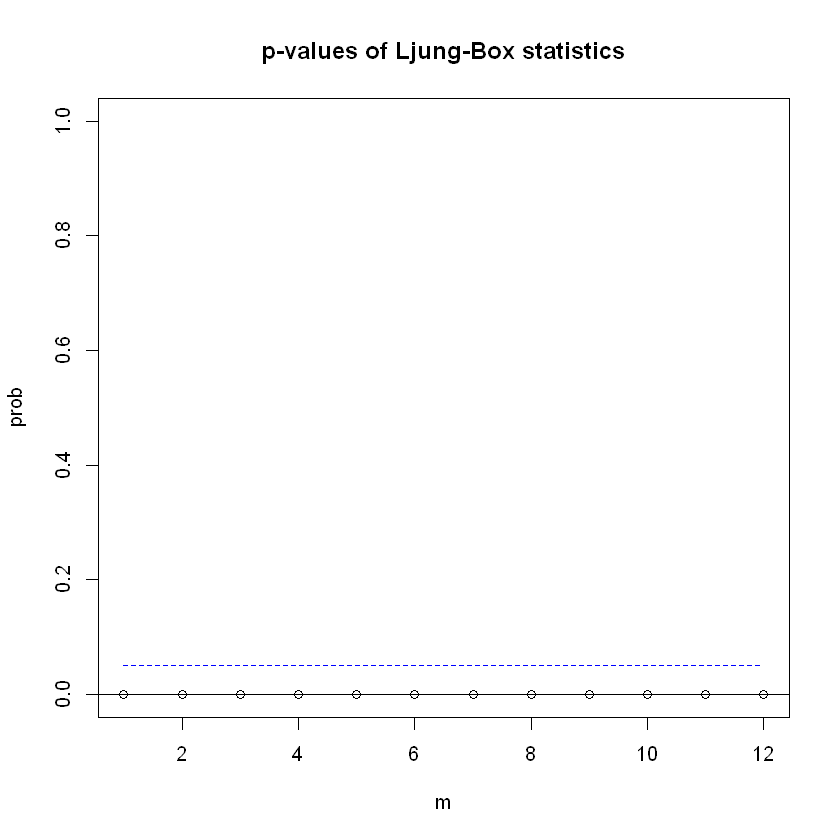

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      48.9    36.0     0.07
 [2,]   2.0      90.1    72.0     0.07
 [3,]   3.0     129.5   108.0     0.08
 [4,]   4.0     166.7   144.0     0.09
 [5,]   5.0     206.0   180.0     0.09
 [6,]   6.0     236.9   216.0     0.16
 [7,]   7.0     270.8   252.0     0.20
 [8,]   8.0     306.8   288.0     0.21
 [9,]   9.0     335.8   324.0     0.31
[10,]  10.0     373.6   360.0     0.30
[11,]  11.0     420.1   396.0     0.19
[12,]  12.0     466.1   432.0     0.12


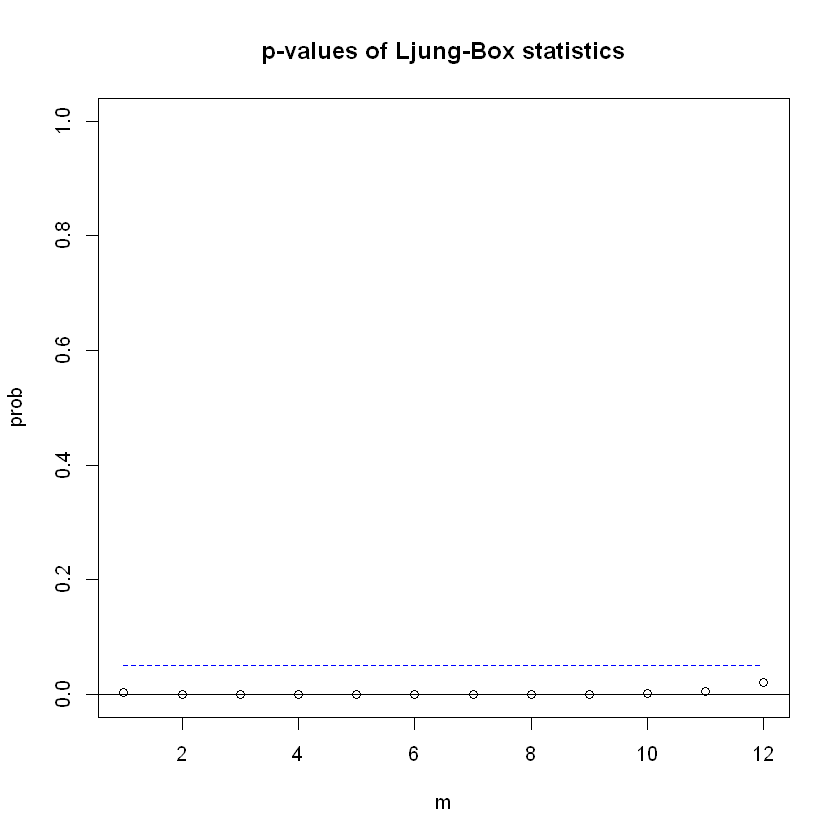

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      54.7    36.0     0.02
 [2,]   2.0     111.8    72.0     0.00
 [3,]   3.0     160.6   108.0     0.00
 [4,]   4.0     206.5   144.0     0.00
 [5,]   5.0     246.8   180.0     0.00
 [6,]   6.0     290.6   216.0     0.00
 [7,]   7.0     327.2   252.0     0.00
 [8,]   8.0     372.4   288.0     0.00
 [9,]   9.0     412.7   324.0     0.00
[10,]  10.0     464.5   360.0     0.00
[11,]  11.0     511.4   396.0     0.00
[12,]  12.0     560.2   432.0     0.00


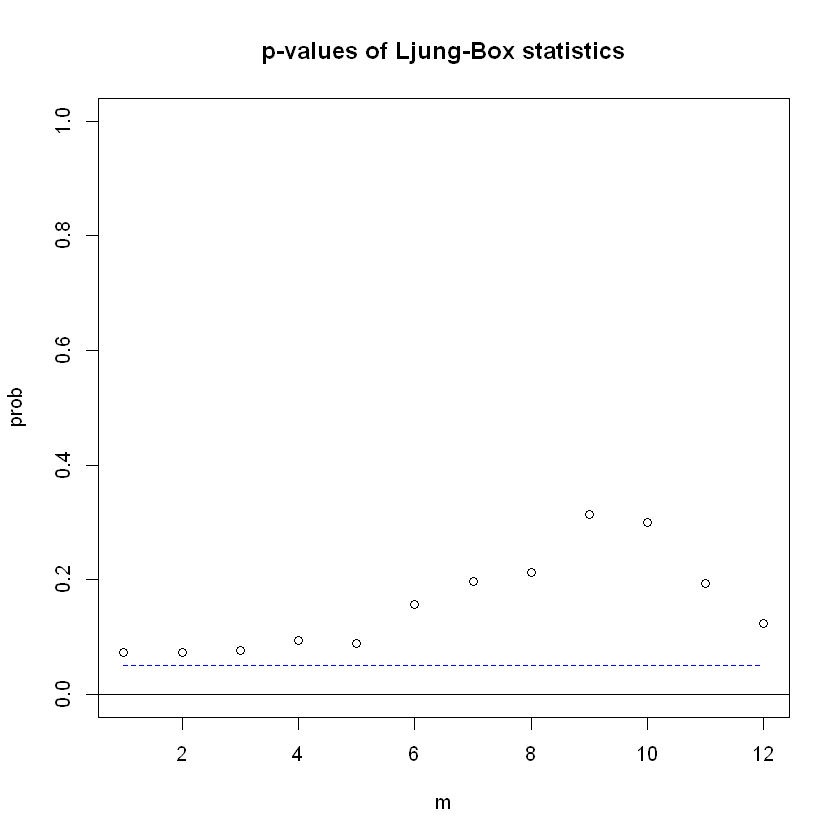

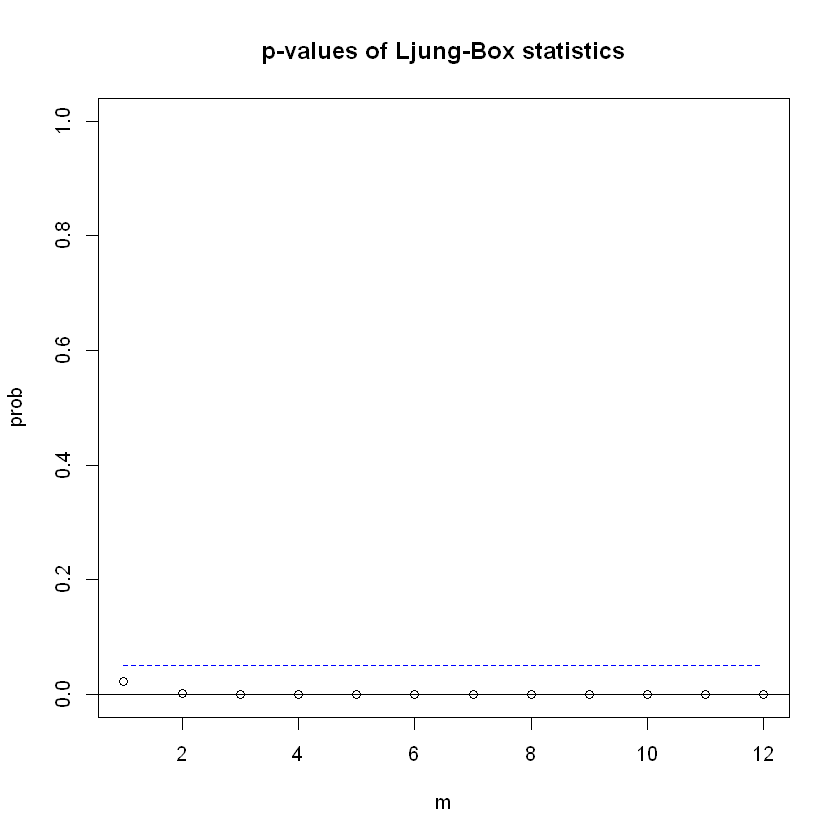

In [22]:
mq(total.Sing[,-1],lag=12)
mq(total.US[,-1],lag=12)
mq(total.UK[,-1],lag=12)

mq(totalbymonth.Sing[,-1],lag=12)
mq(totalbymonth.US[,-1],lag=12)
mq(totalbymonth.UK[,-1],lag=12)

# OLS-base CUSUM test

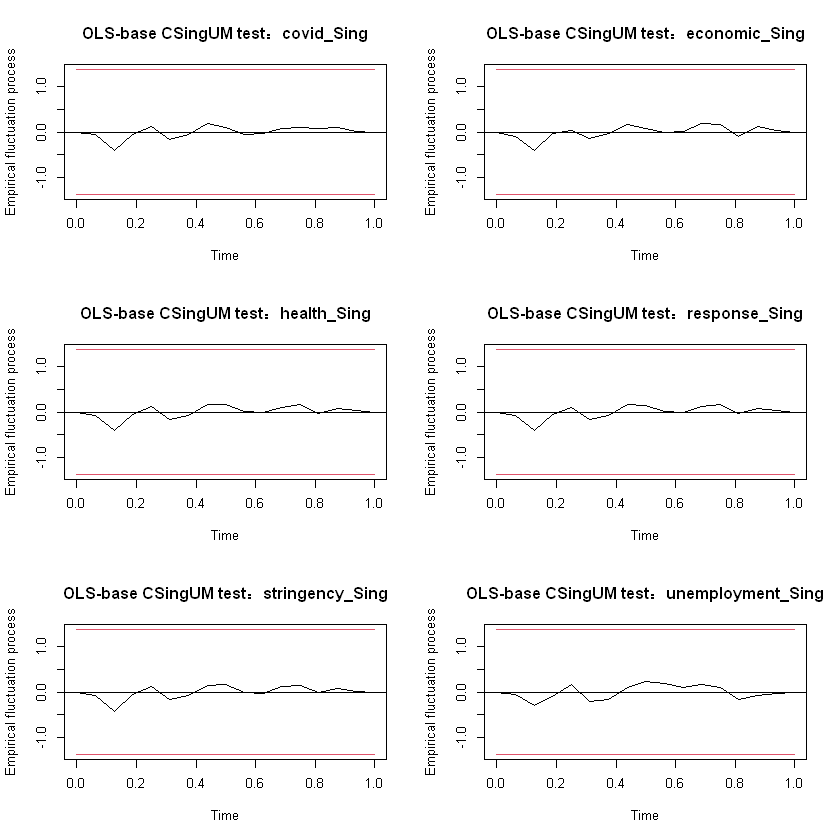

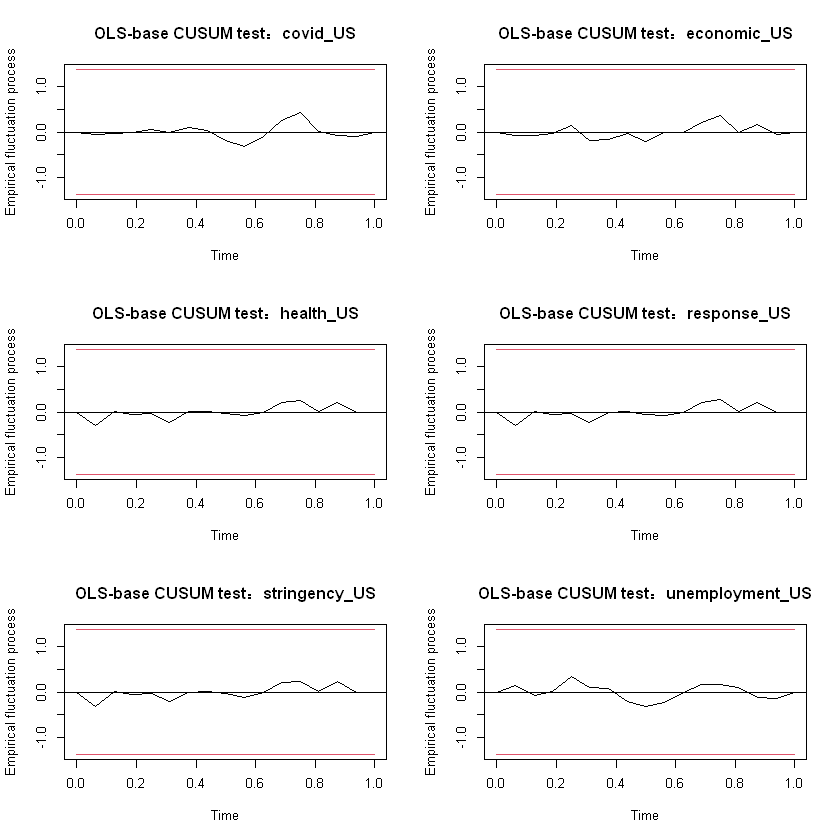

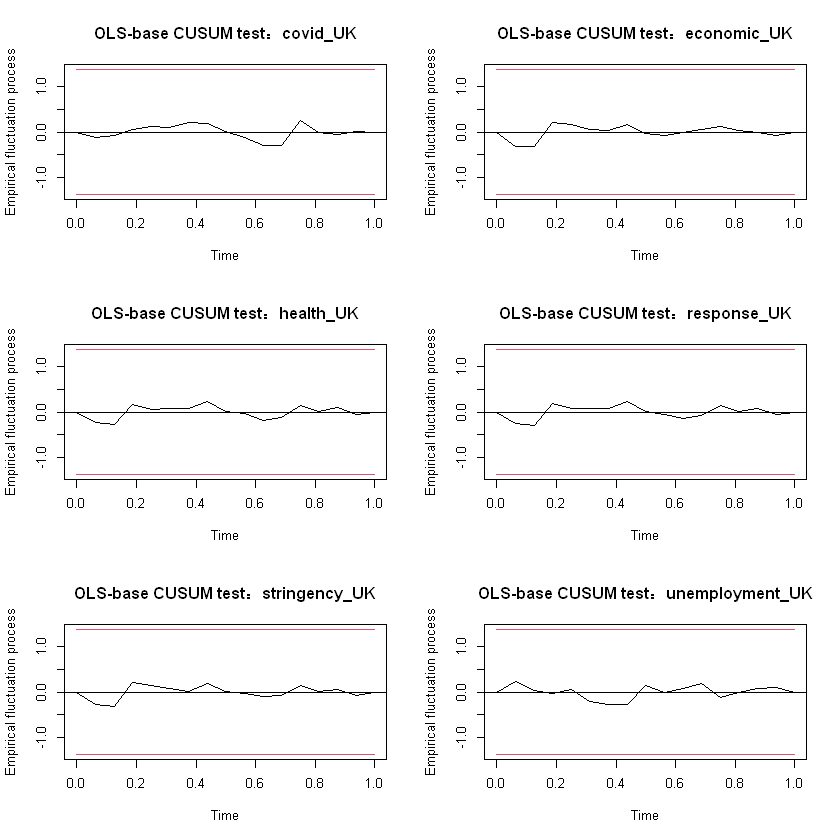

In [23]:

Sing_var=vars::VAR(totalbymonth.Sing,p=1)
diagnostic_Sing <- stability(Sing_var, type = c("OLS-CUSUM"), h = 0.15, dynamic = FALSE, rescale = T)
par(mfrow=c(3,2))
plot(diagnostic_Sing$stability$covid_Sing,main='OLS-base CSingUM test：covid_Sing')
plot(diagnostic_Sing$stability$economic_Sing,main='OLS-base CSingUM test：economic_Sing')
plot(diagnostic_Sing$stability$health_Sing,main='OLS-base CSingUM test：health_Sing')
plot(diagnostic_Sing$stability$response_Sing,main='OLS-base CSingUM test：response_Sing')
plot(diagnostic_Sing$stability$stringency_Sing,main='OLS-base CSingUM test：stringency_Sing')
plot(diagnostic_Sing$stability$unemployment_Sing,main='OLS-base CSingUM test：unemployment_Sing')


US_var=vars::VAR(totalbymonth.US,p=1)
diagnostic_US <- stability(US_var, type = c("OLS-CUSUM"), h = 0.15, dynamic = FALSE, rescale = T)


par(mfrow=c(3,2))
plot(diagnostic_US$stability$covid_US,main='OLS-base CUSUM test：covid_US')
plot(diagnostic_US$stability$economic_US,main='OLS-base CUSUM test：economic_US')
plot(diagnostic_US$stability$health_US,main='OLS-base CUSUM test：health_US')
plot(diagnostic_US$stability$response_US,main='OLS-base CUSUM test：response_US')
plot(diagnostic_US$stability$stringency_US,main='OLS-base CUSUM test：stringency_US')
plot(diagnostic_US$stability$unemployment_US,main='OLS-base CUSUM test：unemployment_US')



UK_var=vars::VAR(totalbymonth.UK,p=1)
diagnostic_UK <- stability(UK_var, type = c("OLS-CUSUM"), h = 0.15, dynamic = FALSE, rescale = T)


par(mfrow=c(3,2))
plot(diagnostic_UK$stability$covid_UK,main='OLS-base CUSUM test：covid_UK')
plot(diagnostic_UK$stability$economic_UK,main='OLS-base CUSUM test：economic_UK')
plot(diagnostic_UK$stability$health_UK,main='OLS-base CUSUM test：health_UK')
plot(diagnostic_UK$stability$response_UK,main='OLS-base CUSUM test：response_UK')
plot(diagnostic_UK$stability$stringency_UK,main='OLS-base CUSUM test：stringency_UK')
plot(diagnostic_UK$stability$unemployment_UK,main='OLS-base CUSUM test：unemployment_UK')

# VAR MODEL

AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      2      2      7


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.Sing.var
Chi-squared = 587.25, df = 225, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.Sing.var
Chi-squared = 587.25, df = 225, p-value < 2.2e-16



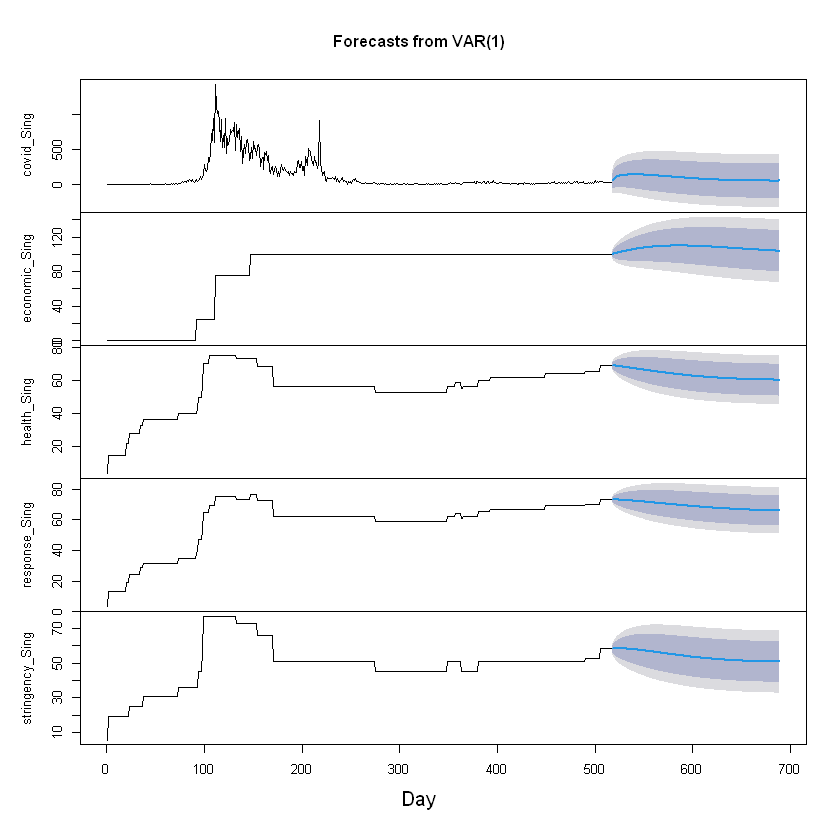

,forecast_Sing_covid,forecast_Sing_covid_low_80,forecast_Sing_covid_high_80,forecast_Sing_covid_low_95,forecast_Sing_covid_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52.65123,-54.30205,159.6045,-110.9197,216.2222
2,73.62751,-56.04098,203.2960,-124.6833,271.9383
3,88.67736,-51.43282,228.7875,-125.6027,302.9574
4,99.65689,-46.64322,245.9570,-124.0898,323.4036
5,107.82070,-43.07487,258.7163,-122.9542,338.5956
6,114.01797,-40.85273,268.8887,-122.8363,350.8723


,forecast_Sing_economic,forecast_Sing_economic_low_80,forecast_Sing_economic_high_80,forecast_Sing_economic_low_95,forecast_Sing_economic_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.3676,96.96764,103.7676,95.16779,105.5675
2,100.7072,95.96089,105.4535,93.44834,107.9661
3,101.0268,95.27945,106.7742,92.23697,109.8167
4,101.3319,94.76261,107.9013,91.28502,111.3789
5,101.6261,94.34927,108.9029,90.49716,112.7550
6,101.9116,94.00862,109.8147,89.82501,113.9983


,forecast_Sing_health,forecast_Sing_health_low_80,forecast_Sing_health_high_80,forecast_Sing_health_low_95,forecast_Sing_health_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,69.30717,67.71247,70.90186,66.86829,71.74605
2,69.21633,66.97403,71.45863,65.78703,72.64564
3,69.12683,66.39600,71.85766,64.95039,73.30327
4,69.03821,65.90236,72.17406,64.24234,73.83409
5,68.95017,65.46335,72.43699,63.61754,74.28280
6,68.86251,65.06361,72.66140,63.05260,74.67242


,forecast_Sing_response,forecast_Sing_response_low_80,forecast_Sing_response_high_80,forecast_Sing_response_low_95,forecast_Sing_response_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,73.19430,71.74002,74.64858,70.97017,75.41842
2,73.15687,71.10668,75.20707,70.02137,76.29237
3,73.11815,70.61529,75.62102,69.29035,76.94596
4,73.07842,70.19788,75.95895,68.67302,77.48382
5,73.03784,69.82812,76.24756,68.12900,77.94669
6,72.99654,69.49246,76.50061,67.63752,78.35555


,forecast_Sing_stringency,forecast_Sing_stringency_low_80,forecast_Sing_stringency_high_80,forecast_Sing_stringency_low_95,forecast_Sing_stringency_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58.33782,56.28459,60.39104,55.19768,61.47795
2,58.34790,55.47110,61.22470,53.94821,62.74758
3,58.35771,54.86460,61.85082,53.01546,63.69996
4,58.36564,54.36474,62.36654,52.24679,64.48448
5,58.37066,53.93200,62.80933,51.58231,65.15901
6,58.37218,53.54596,63.19841,50.99111,65.75326


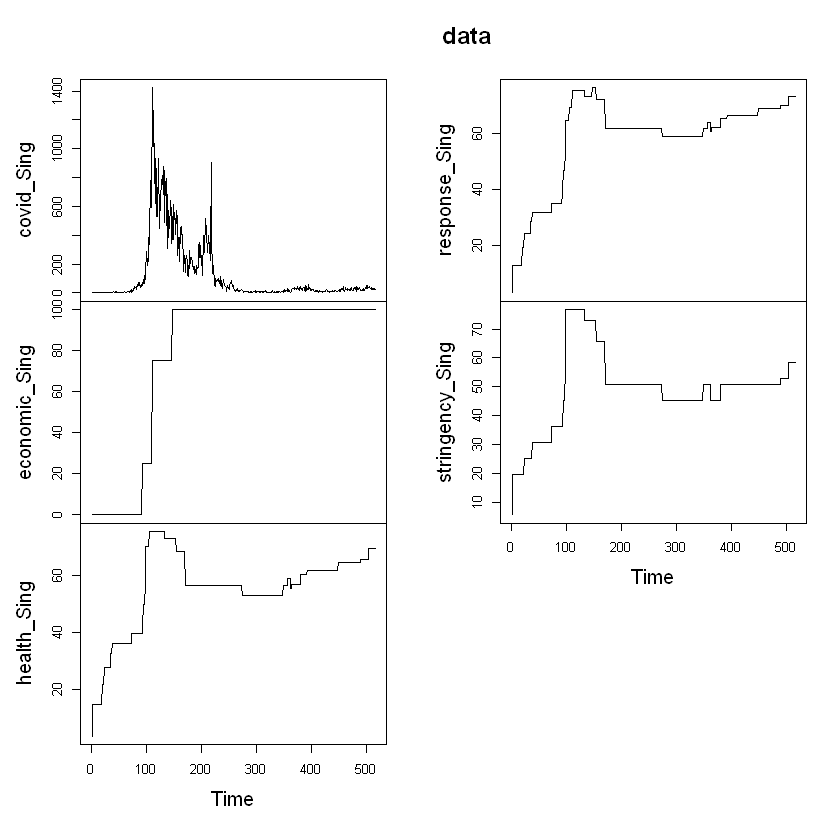

In [24]:

train_size <- nrow(total)
test_size=floor(nrow(total)/3)
train_ind <- 1:train_size
train_size <- nrow(total)
test_size=floor(nrow(total)/3)
forecast_time=data.frame(Date=as.Date(total[nrow(total),1])+1)
for(i in 2:test_size){
  forecast_time[i,1]=as.Date(total[nrow(total),1])+i
}

total.Sing.train <- total.Sing[train_ind, ]


VARselect(total.Sing.train[,-1], lag.max=8, type="const")[["selection"]]
total.Sing.var=VAR(as.ts(total.Sing.train[,-1]),p=1,type="const")
serial.test(total.Sing.var,lags.pt = 10, type="PT.asymptotic")
plot(forecast(total.Sing.var,test_size),xlab="Day")
MTSplot(as.ts(total.Sing[,-1]))


forest.total.Sing=forecast(total.Sing.var,test_size)

forest.total.Sing.covid=cbind(forecast_time,forest.total.Sing$forecast[1]$covid_Sing)
colnames(forest.total.Sing.covid)=c("Date","forecast_Sing_covid","forecast_Sing_covid_low_80","forecast_Sing_covid_high_80","forecast_Sing_covid_low_95","forecast_Sing_covid_high_95")

write.csv(forest.total.Sing.covid,file="forest_Sing_covid.csv",row.names = F)


forest.total.Sing.economic=cbind(forecast_time,forest.total.Sing$forecast[2]$economic_Sing)
colnames(forest.total.Sing.economic)=c("Date","forecast_Sing_economic","forecast_Sing_economic_low_80","forecast_Sing_economic_high_80","forecast_Sing_economic_low_95","forecast_Sing_economic_high_95")
write.csv(forest.total.Sing.economic,file="forest_Sing_economic.csv",row.names = F)

forest.total.Sing.health=cbind(forecast_time,forest.total.Sing$forecast[3]$health_Sing)
colnames(forest.total.Sing.health)=c("Date","forecast_Sing_health","forecast_Sing_health_low_80","forecast_Sing_health_high_80","forecast_Sing_health_low_95","forecast_Sing_health_high_95")
write.csv(forest.total.Sing.health,file="forest_Sing_health.csv",row.names = F)


forest.total.Sing.response=cbind(forecast_time,forest.total.Sing$forecast[4]$response_Sing)
colnames(forest.total.Sing.response)=c("Date","forecast_Sing_response","forecast_Sing_response_low_80","forecast_Sing_response_high_80","forecast_Sing_response_low_95","forecast_Sing_response_high_95")
write.csv(forest.total.Sing.response,file="forest_Sing_response.csv",row.names = F)

forest.total.Sing.stringency=cbind(forecast_time,forest.total.Sing$forecast[5]$stringency_Sing)
colnames(forest.total.Sing.stringency)=c("Date","forecast_Sing_stringency","forecast_Sing_stringency_low_80","forecast_Sing_stringency_high_80","forecast_Sing_stringency_low_95","forecast_Sing_stringency_high_95")
write.csv(forest.total.Sing.stringency,file="forest_Sing_strigency.csv",row.names = F)


forest.total.Sing.all=cbind(forest.total.Sing.covid,forest.total.Sing.economic,forest.total.Sing.health,forest.total.Sing.response,forest.total.Sing.stringency)
forest.total.Sing=cbind(forest.total.Sing.covid[,c(1,2)],forest.total.Sing.economic[,c(1,2)],forest.total.Sing.health[,c(1,2)],forest.total.Sing.response[,c(1,2)],forest.total.Sing.stringency[,c(1,2)])


forest.total.Sing=forest.total.Sing[,c(1,2,4,6,8,10)]

write.csv(forest.total.Sing,file="forest_Sing.csv",row.names = F)
head(forest.total.Sing.covid[,-1])
head(forest.total.Sing.economic[,-1])
head(forest.total.Sing.health[,-1])
head(forest.total.Sing.response[,-1])
head(forest.total.Sing.stringency[,-1])

AIC(n)  HQ(n)  SC(n) FPE(n) 
     8      6      2      8


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.UK.var
Chi-squared = 1078.5, df = 225, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.UK.var
Chi-squared = 1078.5, df = 225, p-value < 2.2e-16



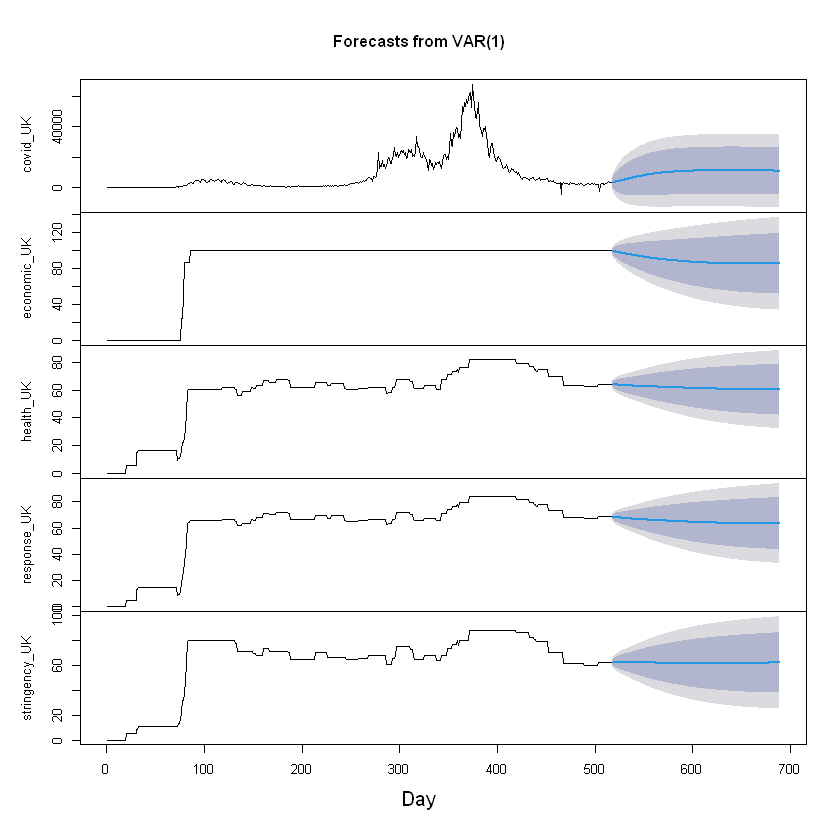

,forecast_UK_covid,forecast_UK_covid_low_80,forecast_UK_covid_high_80,forecast_UK_covid_low_95,forecast_UK_covid_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3383.533,362.0155,6405.051,-1237.479,8004.545
2,3488.946,-749.1776,7727.069,-2992.705,9970.596
3,3607.614,-1540.9273,8756.156,-4266.401,11481.629
4,3737.254,-2159.8933,9634.402,-5281.655,12756.163
5,3875.879,-2664.4944,10416.252,-6126.759,13878.516
6,4021.760,-3085.6436,11129.163,-6848.076,14891.595


,forecast_UK_economic,forecast_UK_economic_low_80,forecast_UK_economic_high_80,forecast_UK_economic_low_95,forecast_UK_economic_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,99.69778,96.74493,102.6506,95.18179,104.2138
2,99.40768,95.23924,103.5761,93.03261,105.7828
3,99.12837,94.03155,104.2252,91.33346,106.9233
4,98.85871,92.98236,104.7351,89.87161,107.8458
5,98.59770,92.03693,105.1585,88.56387,108.6315
6,98.34446,91.16673,105.5222,87.36707,109.3218


,forecast_UK_health,forecast_UK_health_low_80,forecast_UK_health_high_80,forecast_UK_health_low_95,forecast_UK_health_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64.20933,62.41486,66.00381,61.46492,66.95375
2,64.08265,61.60757,66.55773,60.29735,67.86796
3,63.96829,61.00749,66.92908,59.44014,68.49643
4,63.86477,60.52054,67.20901,58.75021,68.97934
5,63.77083,60.10798,67.43367,58.16899,69.37266
6,63.68530,59.74868,67.62192,57.66477,69.70584


,forecast_UK_response,forecast_UK_response_low_80,forecast_UK_response_high_80,forecast_UK_response_low_95,forecast_UK_response_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,68.64004,66.99356,70.28652,66.12197,71.15812
2,68.49372,66.21010,70.77734,65.00123,71.98621
3,68.35942,65.61190,71.10694,64.15745,72.56139
4,68.23574,65.11404,71.35744,63.46151,73.00997
5,68.12143,64.68172,71.56113,62.86085,73.38200
6,68.01539,64.29610,71.73468,62.32723,73.70355


,forecast_UK_stringency,forecast_UK_stringency_low_80,forecast_UK_stringency_high_80,forecast_UK_stringency_low_95,forecast_UK_stringency_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,62.48104,60.35187,64.61021,59.22476,65.73732
2,62.46079,59.50668,65.41490,57.94287,66.97872
3,62.43963,58.88345,65.99582,57.00092,67.87835
4,62.41787,58.37435,66.46138,56.23384,68.60189
5,62.39575,57.93621,66.85530,55.57547,69.21604
6,62.37350,57.54625,67.20075,54.99085,69.75614


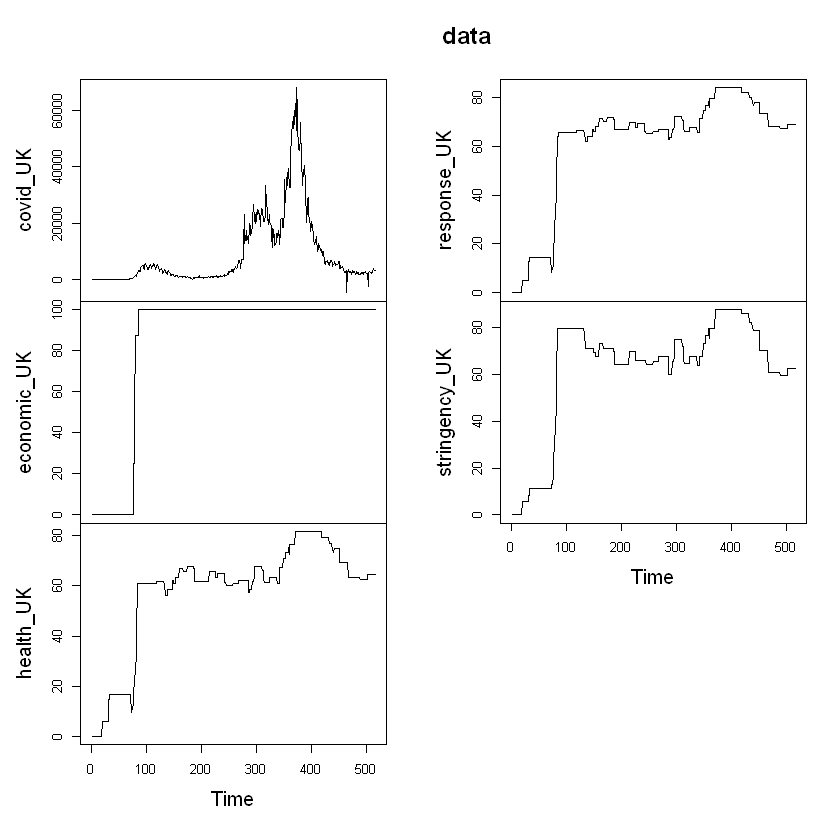

In [25]:

train_size <- nrow(total)
test_size=floor(nrow(total)/3)
train_ind <- 1:train_size
train_size <- nrow(total)
test_size=floor(nrow(total)/3)
forecast_time=data.frame(Date=as.Date(total[nrow(total),1])+1)
for(i in 2:test_size){
  forecast_time[i,1]=as.Date(total[nrow(total),1])+i
}


total.UK.train <- total.UK[train_ind, ]

VARselect(total.UK.train[,-1], lag.max=8, type="const")[["selection"]]
total.UK.var=VAR(as.ts(total.UK.train[,-1]),p=1,type="const")
serial.test(total.UK.var,lags.pt = 10, type="PT.asymptotic")
plot(forecast(total.UK.var,test_size),xlab="Day")
MTSplot(as.ts(total.UK[,-1]))
forest.total.UK=forecast(total.UK.var,test_size)

forest.total.UK.covid=cbind(forecast_time,forest.total.UK$forecast[1]$covid_UK)
colnames(forest.total.UK.covid)=c("Date","forecast_UK_covid","forecast_UK_covid_low_80","forecast_UK_covid_high_80","forecast_UK_covid_low_95","forecast_UK_covid_high_95")

write.csv(forest.total.UK.covid,file="forest_UK_covid.csv",row.names = F)


forest.total.UK.economic=cbind(forecast_time,forest.total.UK$forecast[2]$economic_UK)
colnames(forest.total.UK.economic)=c("Date","forecast_UK_economic","forecast_UK_economic_low_80","forecast_UK_economic_high_80","forecast_UK_economic_low_95","forecast_UK_economic_high_95")
write.csv(forest.total.UK.economic,file="forest_UK_economic.csv",row.names = F)

forest.total.UK.health=cbind(forecast_time,forest.total.UK$forecast[3]$health_UK)
colnames(forest.total.UK.health)=c("Date","forecast_UK_health","forecast_UK_health_low_80","forecast_UK_health_high_80","forecast_UK_health_low_95","forecast_UK_health_high_95")
write.csv(forest.total.UK.health,file="forest_UK_health.csv",row.names = F)


forest.total.UK.response=cbind(forecast_time,forest.total.UK$forecast[4]$response_UK)
colnames(forest.total.UK.response)=c("Date","forecast_UK_response","forecast_UK_response_low_80","forecast_UK_response_high_80","forecast_UK_response_low_95","forecast_UK_response_high_95")
write.csv(forest.total.UK.response,file="forest_UK_response.csv",row.names = F)

forest.total.UK.stringency=cbind(forecast_time,forest.total.UK$forecast[5]$stringency_UK)
colnames(forest.total.UK.stringency)=c("Date","forecast_UK_stringency","forecast_UK_stringency_low_80","forecast_UK_stringency_high_80","forecast_UK_stringency_low_95","forecast_UK_stringency_high_95")
write.csv(forest.total.UK.stringency,file="forest_UK_strigency.csv",row.names = F)


forest.total.UK.all=cbind(forest.total.UK.covid,forest.total.UK.economic,forest.total.UK.health,forest.total.UK.response,forest.total.UK.stringency)

forest.total.UK=cbind(forest.total.UK.covid[,c(1,2)],forest.total.UK.economic[,c(1,2)],forest.total.UK.health[,c(1,2)],forest.total.UK.response[,c(1,2)],forest.total.UK.stringency[,c(1,2)])

forest.total.UK=forest.total.UK[,c(1,2,4,6,8,10)]
write.csv(forest.total.UK,file="forest_UK.csv",row.names = F)
head(forest.total.UK.covid[,-1])
head(forest.total.UK.economic[,-1])
head(forest.total.UK.health[,-1])
head(forest.total.UK.response[,-1])
head(forest.total.UK.stringency[,-1])

AIC(n)  HQ(n)  SC(n) FPE(n) 
     8      2      1      8


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.US.var
Chi-squared = 640.6, df = 225, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object total.US.var
Chi-squared = 640.6, df = 225, p-value < 2.2e-16



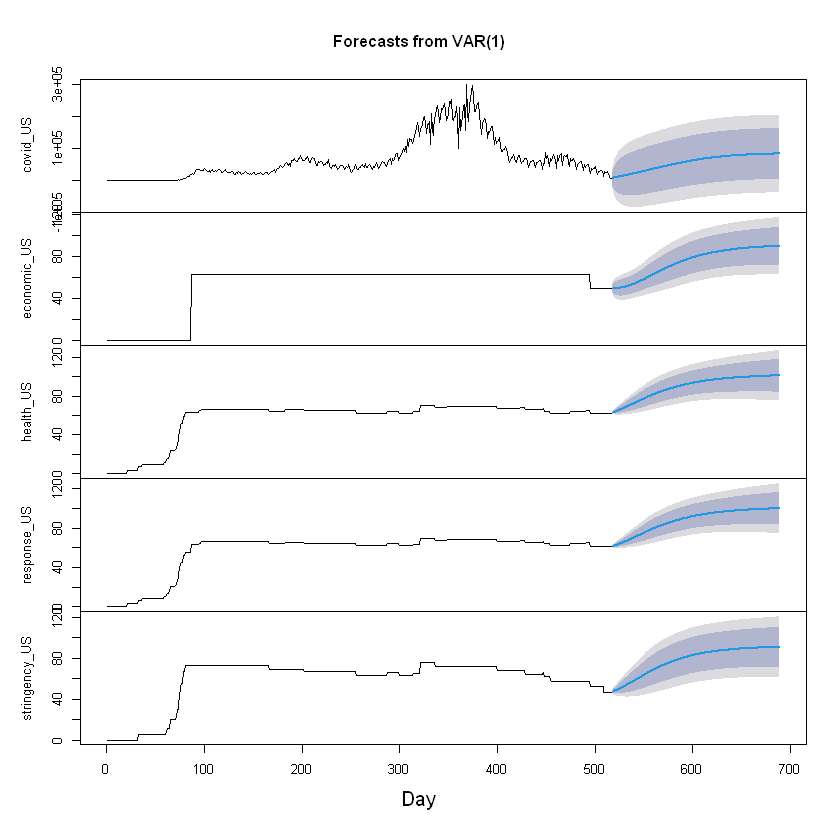

,forecast_US_covid,forecast_US_covid_low_80,forecast_US_covid_high_80,forecast_US_covid_low_95,forecast_US_covid_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6447.290,-15507.91,28402.49,-27130.28,40024.86
2,7111.281,-23230.70,37453.26,-39292.78,53515.34
3,7768.917,-28560.20,44098.04,-47791.68,63329.51
4,8421.139,-32605.16,49447.44,-54323.17,71165.45
5,9068.873,-35808.48,53946.23,-59565.12,77702.86
6,9713.018,-38404.00,57830.04,-63875.61,83301.65


,forecast_US_economic,forecast_US_economic_low_80,forecast_US_economic_high_80,forecast_US_economic_low_95,forecast_US_economic_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49.87013,46.40169,53.33856,44.56561,55.17464
2,49.77872,45.06672,54.49073,42.57234,56.98511
3,49.72418,44.17763,55.27072,41.24147,58.20689
4,49.70490,43.54572,55.86407,40.28525,59.12454
5,49.71932,43.09237,56.34627,39.58428,59.85436
6,49.76593,42.77403,56.75782,39.07275,60.45911


,forecast_US_health,forecast_US_health_low_80,forecast_US_health_high_80,forecast_US_health_low_95,forecast_US_health_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,62.87734,61.79746,63.95721,61.22581,64.52886
2,63.26612,61.71454,64.81770,60.89318,65.63906
3,63.66555,61.73208,65.59903,60.70857,66.62254
4,64.07486,61.80117,66.34854,60.59755,67.55216
5,64.49326,61.90309,67.08344,60.53193,68.45460
6,64.92004,62.02847,67.81161,60.49777,69.34232


,forecast_US_response,forecast_US_response_low_80,forecast_US_response_high_80,forecast_US_response_low_95,forecast_US_response_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,61.25357,60.23938,62.26776,59.70250,62.80465
2,61.58201,60.15349,63.01053,59.39727,63.76675
3,61.92440,60.17310,63.67570,59.24602,64.60279
4,62.27987,60.24685,64.31288,59.17063,65.38910
5,62.64754,60.35415,64.94093,59.14010,66.15497
6,63.02658,60.48436,65.56879,59.13860,66.91456


,forecast_US_stringency,forecast_US_stringency_low_80,forecast_US_stringency_high_80,forecast_US_stringency_low_95,forecast_US_stringency_high_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47.13441,45.55468,48.71415,44.71842,49.55041
2,47.52667,45.25817,49.79517,44.05730,50.99604
3,47.93563,45.11058,50.76068,43.61509,52.25617
4,48.36019,45.04022,51.68016,43.28274,53.43765
5,48.79928,45.01961,52.57896,43.01878,54.57979
6,49.25186,45.03494,53.46879,42.80263,55.70109


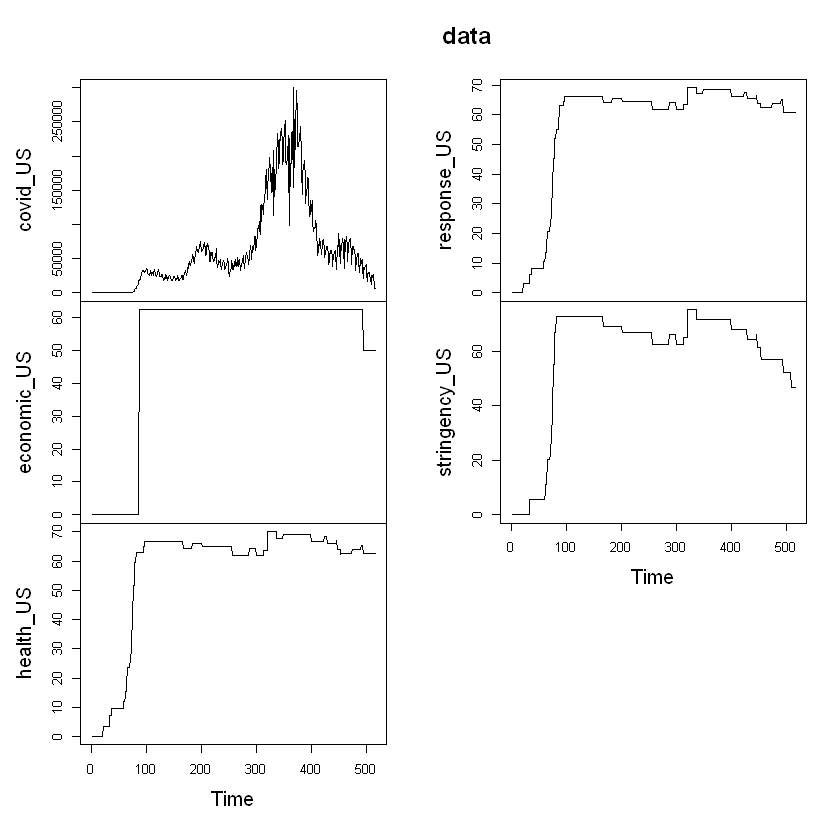

In [26]:

train_size <- nrow(total)
test_size=floor(nrow(total)/3)
train_ind <- 1:train_size
train_size <- nrow(total)
test_size=floor(nrow(total)/3)
forecast_time=data.frame(Date=as.Date(total[nrow(total),1])+1)
for(i in 2:test_size){
  forecast_time[i,1]=as.Date(total[nrow(total),1])+i
}


total.US.train <- total.US[train_ind, ]

VARselect(total.US.train[,-1], lag.max=8, type="const")[["selection"]]
total.US.var=VAR(as.ts(total.US.train[,-1]),p=1,type="const")
serial.test(total.US.var,lags.pt = 10, type="PT.asymptotic")
plot(forecast(total.US.var,test_size),xlab="Day")
MTSplot(as.ts(total.US[,-1]))


forest.total.US=forecast(total.US.var,test_size)

forest.total.US.covid=cbind(forecast_time,forest.total.US$forecast[1]$covid_US)
colnames(forest.total.US.covid)=c("Date","forecast_US_covid","forecast_US_covid_low_80","forecast_US_covid_high_80","forecast_US_covid_low_95","forecast_US_covid_high_95")

write.csv(forest.total.US.covid,file="forest_US_covid.csv",row.names = F)


forest.total.US.economic=cbind(forecast_time,forest.total.US$forecast[2]$economic_US)
colnames(forest.total.US.economic)=c("Date","forecast_US_economic","forecast_US_economic_low_80","forecast_US_economic_high_80","forecast_US_economic_low_95","forecast_US_economic_high_95")
write.csv(forest.total.US.economic,file="forest_US_economic.csv",row.names = F)

forest.total.US.health=cbind(forecast_time,forest.total.US$forecast[3]$health_US)
colnames(forest.total.US.health)=c("Date","forecast_US_health","forecast_US_health_low_80","forecast_US_health_high_80","forecast_US_health_low_95","forecast_US_health_high_95")
write.csv(forest.total.US.health,file="forest_US_health.csv",row.names = F)


forest.total.US.response=cbind(forecast_time,forest.total.US$forecast[4]$response_US)
colnames(forest.total.US.response)=c("Date","forecast_US_response","forecast_US_response_low_80","forecast_US_response_high_80","forecast_US_response_low_95","forecast_US_response_high_95")
write.csv(forest.total.US.response,file="forest_US_response.csv",row.names = F)

forest.total.US.stringency=cbind(forecast_time,forest.total.US$forecast[5]$stringency_US)
colnames(forest.total.US.stringency)=c("Date","forecast_US_stringency","forecast_US_stringency_low_80","forecast_US_stringency_high_80","forecast_US_stringency_low_95","forecast_US_stringency_high_95")
write.csv(forest.total.US.stringency,file="forest_US_strigency.csv",row.names = F)


forest.total.US.all=cbind(forest.total.US.covid,forest.total.US.economic,forest.total.US.health,forest.total.US.response,forest.total.US.stringency)


forest.total.US=cbind(forest.total.US.covid[,c(1,2)],forest.total.US.economic[,c(1,2)],forest.total.US.health[,c(1,2)],forest.total.US.response[,c(1,2)],forest.total.US.stringency[,c(1,2)])
forest.total.US=forest.total.US[,c(1,2,4,6,8,10)]
write.csv(forest.total.US,file="forest_US.csv",row.names = F)
head(forest.total.US.covid[,-1])
head(forest.total.US.economic[,-1])
head(forest.total.US.health[,-1])
head(forest.total.US.response[,-1])
head(forest.total.US.stringency[,-1])

In [27]:

forest.total=cbind(forest.total.Sing,forest.total.UK[,-1],forest.total.US[,-1])
write.csv(forest.total,file = "forest_total.csv",row.names = F)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2

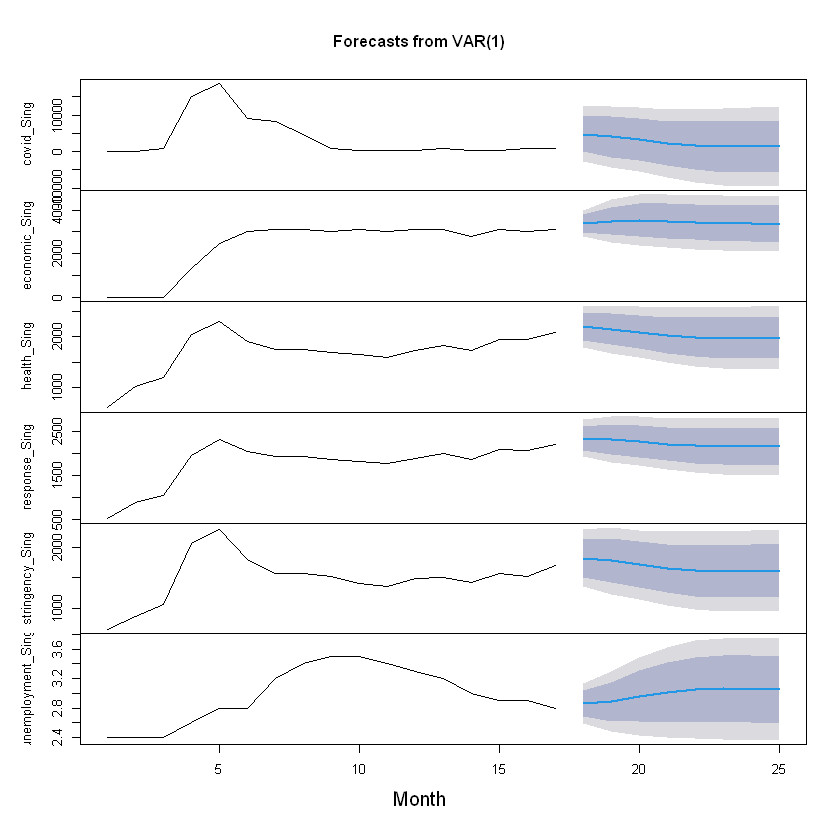

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      1

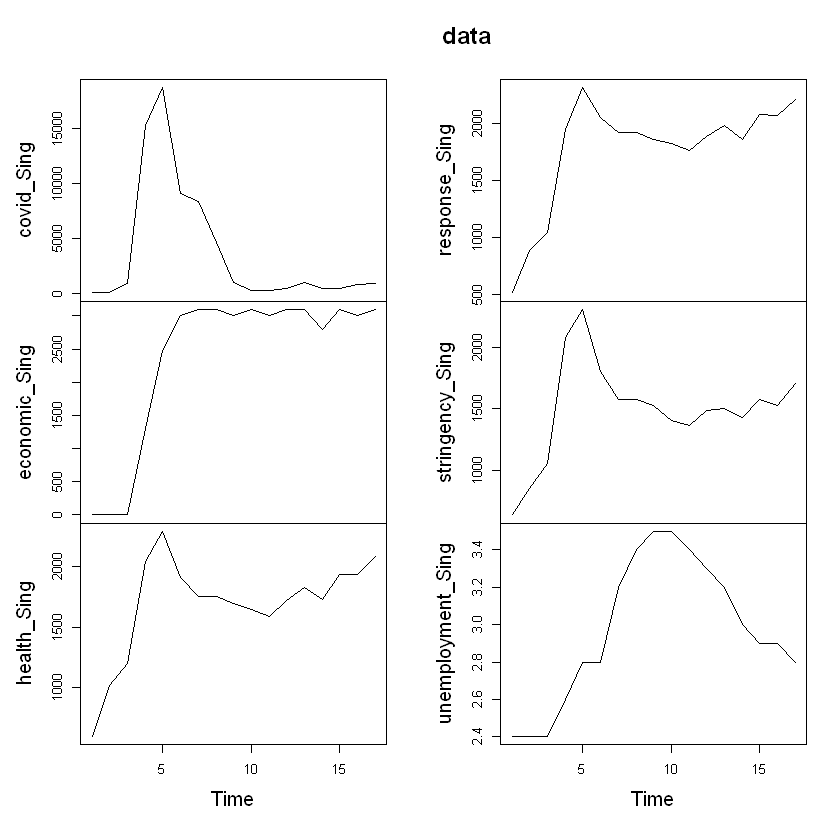

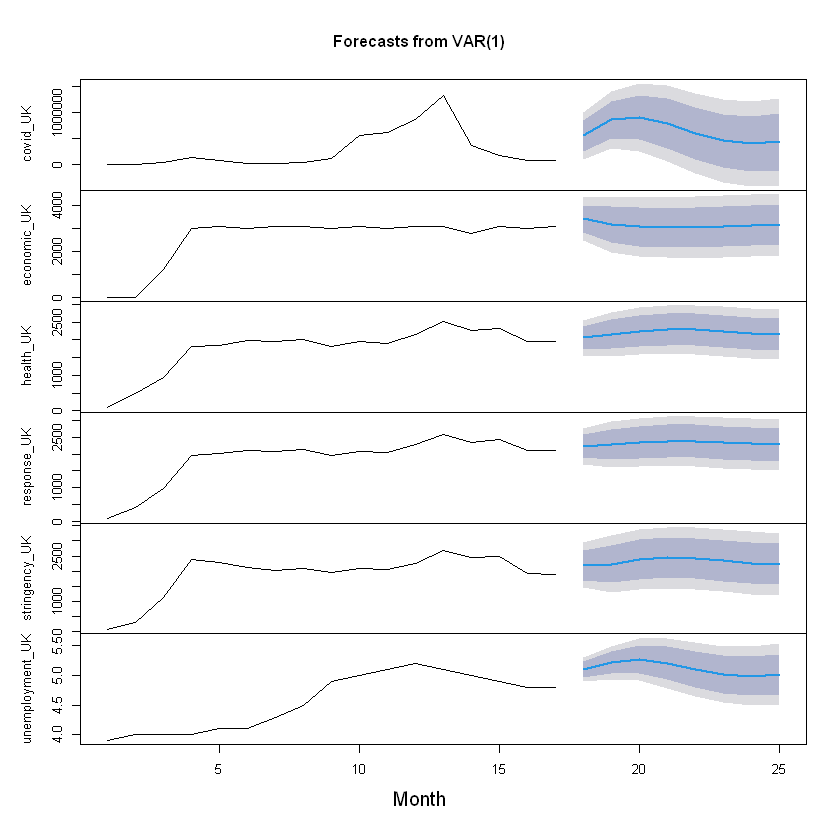

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2

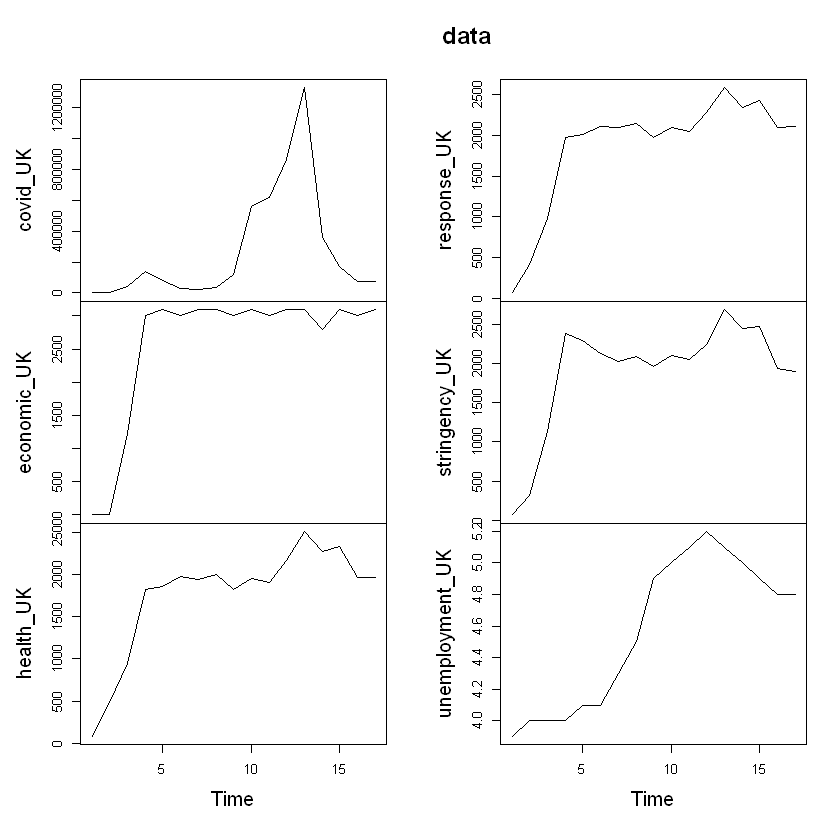

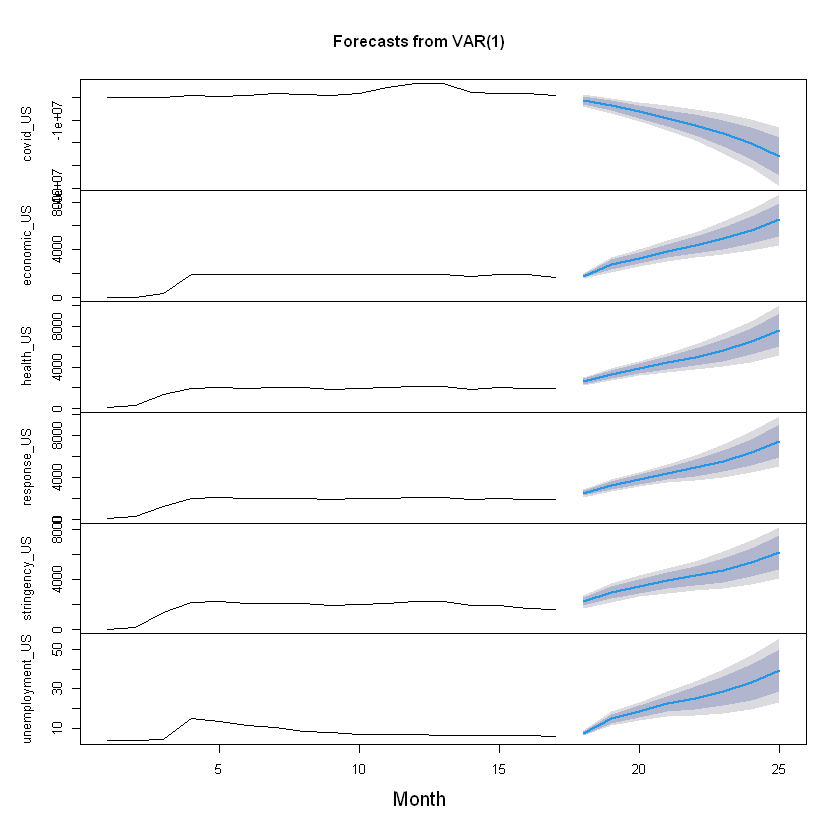

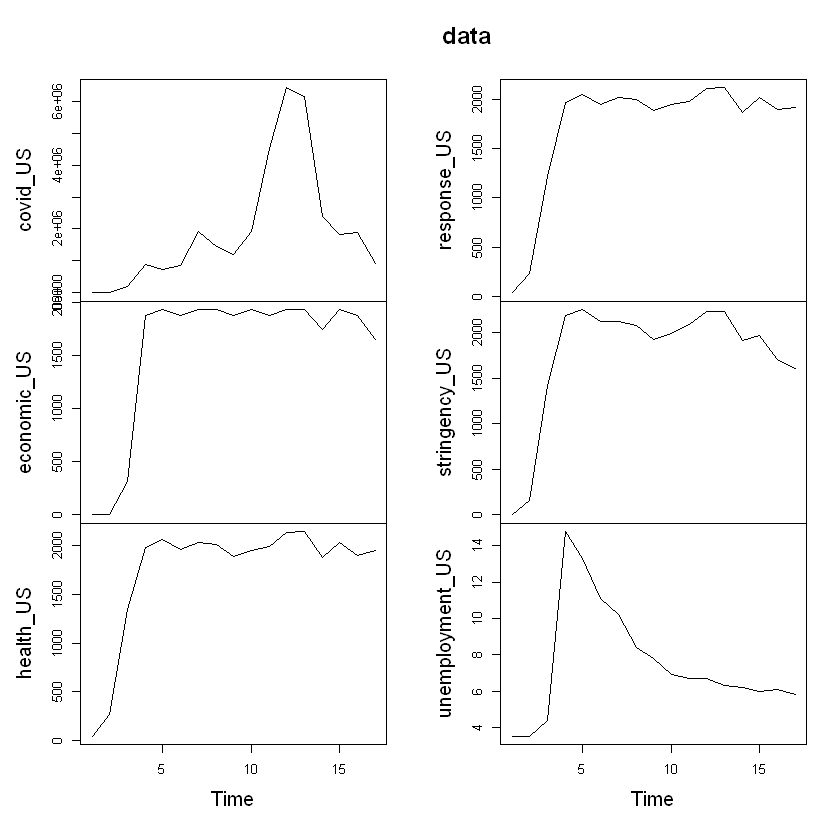

In [28]:

train_size <- nrow(totalbymonth)
test_size=floor(nrow(totalbymonth)/2)
train_ind <- 1:train_size
forecast_time=data.frame(Month=totalbymonth[nrow(totalbymonth),1]+1)
for(i in 2:test_size){
  forecast_time[i,1]=totalbymonth[nrow(totalbymonth),1]+i
}

totalbymonth.Sing.train <- totalbymonth.Sing[train_ind, ]



VARselect(totalbymonth.Sing.train[,-1], lag.max=8, type="const")[["selection"]]
totalbymonth.Sing.var=VAR(as.ts(totalbymonth.Sing.train[,-1]),p=1,type="const")
forecast.totalbymonth.Sing.var=forecast(totalbymonth.Sing.var,test_size)
plot(forecast.totalbymonth.Sing.var,xlab="Month")
MTSplot(as.ts(totalbymonth.Sing[,-1]))




totalbymonth.UK.train <- totalbymonth.UK[train_ind, ]

VARselect(totalbymonth.UK.train[,-1], lag.max=8, type="const")[["selection"]]
totalbymonth.UK.var=VAR(as.ts(totalbymonth.UK.train[,-1]),p=1,type="const")
forecast.totalbymonth.UK.var=forecast(totalbymonth.UK.var,test_size)
plot(forecast.totalbymonth.UK.var,xlab="Month")
MTSplot(as.ts(totalbymonth.UK[,-1]))



totalbymonth.US.train <- totalbymonth.US[train_ind, ]
VARselect(totalbymonth.US.train[,-1], lag.max=8, type="const")[["selection"]]
totalbymonth.US.var=VAR(as.ts(totalbymonth.US.train[,-1]),p=1,type="const")
forecast.totalbymonth.US.var=forecast(totalbymonth.US.var,test_size)
plot(forecast.totalbymonth.US.var,xlab="Month")
MTSplot(as.ts(totalbymonth.US[,-1]))

In [29]:
forecast.totalbymonth.US.var$forecast[6]$unemployment_US
forecast.totalbymonth.Sing.var$forecast[6]$unemployment_Sing
forecast.totalbymonth.UK.var$forecast[6]$unemployment_UK

   Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
18        7.31768  6.480471  8.154889  6.037279  8.598081
19       14.86883 12.582801 17.154854 11.372652 18.365003
20       18.48227 15.561928 21.402610 14.015993 22.948545
21       22.33748 18.264843 26.410123 16.108917 28.566049
22       25.34794 19.676952 31.018930 16.674911 34.020970
23       28.88373 21.482005 36.285446 17.563771 40.203680
24       33.40140 24.311678 42.491122 19.499870 47.302930
25       39.50307 28.717310 50.288826 23.007674 55.998462

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
18       2.864618 2.685116 3.044119 2.590094 3.139142
19       2.885192 2.619862 3.150521 2.479405 3.290978
20       2.958403 2.613084 3.303721 2.430284 3.486521
21       3.011324 2.610408 3.412240 2.398175 3.624472
22       3.048003 2.613023 3.482983 2.382759 3.713248
23       3.059497 2.610676 3.508319 2.373084 3.745910
24       3.057031 2.604817 3.509244 2.365430 3.748632
25       3.047803 2.594991 3.500615 2.355287 3.740319

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
18       5.100881 4.969302 5.232461 4.899647 5.302116
19       5.218235 5.036208 5.400261 4.939849 5.496620
20       5.272435 5.037203 5.507666 4.912680 5.632190
21       5.207019 4.929609 5.484429 4.782757 5.631281
22       5.101732 4.803077 5.400387 4.644978 5.558486
23       5.018940 4.706230 5.331650 4.540691 5.497189
24       4.991461 4.664294 5.318629 4.491102 5.491821
25       5.016459 4.677483 5.355435 4.498040 5.534878

In [30]:

forecast.US.unemployment=data.frame(forecast.totalbymonth.US.var$forecast[6]$unemployment_US)

forecast.Sing.unemployment=data.frame(forecast.totalbymonth.Sing.var$forecast[6]$unemployment_Sing)

forecast.UK.unemployment=data.frame(forecast.totalbymonth.UK.var$forecast[6]$unemployment_UK)
colnames(forecast.US.unemployment)==c("unemploymeny_US","unemploymeny_US_low80","unemploymeny_US_high80","unemploymeny_US_low95","unemploymeny_US_high95")
colnames(forecast.Sing.unemployment)=c("unemploymeny_Sing","unemploymeny_Sing_low80","unemploymeny_Sing_high80","unemploymeny_Sing_low95","unemploymeny_Sing_high95")
colnames(forecast.UK.unemployment)=c("unemploymeny_UK","unemploymeny_UK_low80","unemploymeny_UK_high80","unemploymeny_UK_low95","unemploymeny_UK_high95")

[1] FALSE FALSE FALSE FALSE FALSE

In [31]:
Month=data.frame(Month=c("2021-06","2021-07","2021-08","2021-09","2021-10","2021-11","2021-12","2022-01"))

forecast.unemployment.all=cbind(Month,forecast.Sing.unemployment,forecast.UK.unemployment,forecast.US.unemployment)
head(forecast.unemployment.all)

,Month,unemploymeny_Sing,unemploymeny_Sing_low80,unemploymeny_Sing_high80,unemploymeny_Sing_low95,unemploymeny_Sing_high95,unemploymeny_UK,unemploymeny_UK_low80,unemploymeny_UK_high80,unemploymeny_UK_low95,unemploymeny_UK_high95,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,2021-06,2.864618,2.685116,3.044119,2.590094,3.139142,5.100881,4.969302,5.232461,4.899647,5.302116,7.31768,6.480471,8.154889,6.037279,8.598081
19,2021-07,2.885192,2.619862,3.150521,2.479405,3.290978,5.218235,5.036208,5.400261,4.939849,5.496620,14.86883,12.582801,17.154854,11.372652,18.365003
20,2021-08,2.958403,2.613084,3.303721,2.430284,3.486521,5.272435,5.037203,5.507666,4.912680,5.632190,18.48227,15.561928,21.402610,14.015993,22.948545
21,2021-09,3.011324,2.610408,3.412240,2.398175,3.624472,5.207019,4.929609,5.484429,4.782757,5.631281,22.33748,18.264843,26.410123,16.108917,28.566049
22,2021-10,3.048003,2.613023,3.482983,2.382759,3.713248,5.101732,4.803077,5.400387,4.644978,5.558486,25.34794,19.676952,31.018930,16.674911,34.020970
23,2021-11,3.059497,2.610676,3.508319,2.373084,3.745910,5.018940,4.706230,5.331650,4.540691,5.497189,28.88373,21.482005,36.285446,17.563771,40.203680


In [32]:
forecast.unemployment=forecast.unemployment.all[,c(1,2,7,12)]
colnames(forecast.unemployment)[4]="unemploymeny_US"
write.csv(forecast.unemployment,file = "forecast_unemployment.csv",row.names = F)
